# valentin

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("global_power_plant_database.csv")

In [3]:
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,url,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,estimated_generation_gwh
0,AFG,Afghanistan,Kajaki Hydroelectric Power Plant Afghanistan,GEODB0040538,33.00,32.3220,65.1190,Hydro,NaN,NaN,...,http://globalenergyobservatory.org,GEODB,1009793,2017.0,NaN,NaN,NaN,NaN,NaN,NaN
1,AFG,Afghanistan,Mahipar Hydroelectric Power Plant Afghanistan,GEODB0040541,66.00,34.5560,69.4787,Hydro,NaN,NaN,...,http://globalenergyobservatory.org,GEODB,1009795,2017.0,NaN,NaN,NaN,NaN,NaN,NaN
2,AFG,Afghanistan,Naghlu Dam Hydroelectric Power Plant Afghanistan,GEODB0040534,100.00,34.6410,69.7170,Hydro,NaN,NaN,...,http://globalenergyobservatory.org,GEODB,1009797,2017.0,NaN,NaN,NaN,NaN,NaN,NaN
3,AFG,Afghanistan,Nangarhar (Darunta) Hydroelectric Power Plant ...,GEODB0040536,11.55,34.4847,70.3633,Hydro,NaN,NaN,...,http://globalenergyobservatory.org,GEODB,1009787,2017.0,NaN,NaN,NaN,NaN,NaN,NaN
4,AFG,Afghanistan,Northwest Kabul Power Plant Afghanistan,GEODB0040540,42.00,34.5638,69.1134,Gas,NaN,NaN,...,http://globalenergyobservatory.org,GEODB,NaN,2017.0,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df_all = df.drop(['country_long', 'name', 'url', 'geolocation_source', 'wepp_id'], axis=1)

If column `gppd_idnr` is unique, we can set it as index:

In [5]:
df_all['gppd_idnr'].is_unique

True

In [6]:
df_all.set_index('gppd_idnr')

,country,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,owner,source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,estimated_generation_gwh
gppd_idnr,,,,,,,,,,,,,,,,,,
GEODB0040538,AFG,33.00,32.3220,65.1190,Hydro,NaN,NaN,NaN,NaN,NaN,GEODB,2017.0,NaN,NaN,NaN,NaN,NaN,NaN
GEODB0040541,AFG,66.00,34.5560,69.4787,Hydro,NaN,NaN,NaN,NaN,NaN,GEODB,2017.0,NaN,NaN,NaN,NaN,NaN,NaN
GEODB0040534,AFG,100.00,34.6410,69.7170,Hydro,NaN,NaN,NaN,NaN,NaN,GEODB,2017.0,NaN,NaN,NaN,NaN,NaN,NaN
GEODB0040536,AFG,11.55,34.4847,70.3633,Hydro,NaN,NaN,NaN,NaN,NaN,GEODB,2017.0,NaN,NaN,NaN,NaN,NaN,NaN
GEODB0040540,AFG,42.00,34.5638,69.1134,Gas,NaN,NaN,NaN,NaN,NaN,GEODB,2017.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WRI1022386,ZMB,50.00,-12.9667,28.6333,Oil,NaN,NaN,NaN,NaN,ZESCO,Energy Regulation Board of Zambia,NaN,NaN,NaN,NaN,NaN,NaN,120.872642
WRI1022384,ZMB,20.00,-12.8167,28.2000,Oil,NaN,NaN,NaN,NaN,ZESCO,Energy Regulation Board of Zambia,NaN,NaN,NaN,NaN,NaN,NaN,48.349057
WRI1022380,ZMB,108.00,-17.9167,25.8500,Hydro,NaN,NaN,NaN,NaN,ZESCO,Energy Regulation Board of Zambia,NaN,NaN,NaN,NaN,NaN,NaN,702.100000


In [7]:
#Split into one dataset containing estimated and one containing time series data
df_time_series = (df_all.dropna(how='all', subset=['generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017'])
                      .set_index('gppd_idnr'))


df_time_series_complete = df_time_series.dropna(how='any', subset=['generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017'])

df_time_series_incomplete = df_time_series[df_time_series[['generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017']].isnull().any(axis=1)]

df_estimate = (df_all.dropna(how='any', subset=['estimated_generation_gwh'])
                   .set_index('gppd_idnr'))

In [8]:
#We must have some duplicates
len(df_time_series_incomplete)+len(df_estimate)+len(df_time_series_complete)

31814

In [9]:
#Some rows have both estimate and incomplete time series:
s1 = pd.merge(df_time_series_incomplete, df_estimate, how='inner')
s1

,country,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,owner,source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,estimated_generation_gwh
0,AUS,50.0,-34.5034,139.0246,Oil,NaN,NaN,NaN,NaN,Infratil Energy Australia Pty Ltd,Australian Renewable Energy Mapping Infrastruc...,NaN,NaN,NaN,1.653056,5.300833,7.649722,526.452790
1,AUS,37.0,-23.5525,145.3142,Gas,NaN,NaN,NaN,NaN,Ergon Energy Qld Pty Ltd,Australian Renewable Energy Mapping Infrastruc...,NaN,NaN,NaN,NaN,NaN,3.941667,93.304739
2,AUS,113.0,-36.5817,149.1083,Wind,NaN,NaN,NaN,NaN,Boco Rock Wind Farm Pty Ltd,Australian Renewable Energy Mapping Infrastruc...,NaN,NaN,NaN,208.778611,334.114167,349.301667,94.893070
3,AUS,53.0,-31.9867,141.3915,Solar,NaN,NaN,NaN,NaN,AGL Energy,Australian Renewable Energy Mapping Infrastruc...,NaN,NaN,NaN,NaN,92.104722,127.564722,1059.946475
4,AUS,190.0,-20.5447,147.8049,Coal,NaN,NaN,NaN,NaN,RATCH Australia,Australian Renewable Energy Mapping Infrastruc...,NaN,0.214722,NaN,NaN,NaN,NaN,771.660922
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2525,VNM,66.0,14.3656,108.6943,Hydro,NaN,NaN,NaN,2001.0,Vinh Son- Song Hinh Hydropower JSC,Open Development Vietnam,NaN,NaN,NaN,NaN,228.500000,NaN,230.679596
2526,VNM,28.0,14.3611,108.7203,Hydro,NaN,NaN,NaN,2014.0,Vinh Son Hydropower Investment JSC,Open Development Vietnam,NaN,NaN,NaN,NaN,103.000000,NaN,97.864071
2527,VNM,6.6,21.3412,104.3498,Hydro,NaN,NaN,NaN,NaN,Xim Vang Hydro Power JSC,Open Development Vietnam,NaN,NaN,NaN,NaN,68.000000,NaN,23.067960
2528,VNM,19.5,12.1526,108.3787,Hydro,NaN,NaN,NaN,2010.0,Cao Nguyen - Song Da Hydro Power JSC.,Open Development Vietnam,NaN,NaN,NaN,NaN,79.000000,NaN,68.155335


In [10]:
df_time_series_incomplete

,country,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,owner,source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,estimated_generation_gwh
gppd_idnr,,,,,,,,,,,,,,,,,,
AUS0000232,AUS,50.0,-34.5034,139.0246,Oil,NaN,NaN,NaN,NaN,Infratil Energy Australia Pty Ltd,Australian Renewable Energy Mapping Infrastruc...,NaN,NaN,NaN,1.653056,5.300833,7.649722,526.452790
AUS0000114,AUS,165.0,-38.3861,144.1828,Coal,NaN,NaN,NaN,NaN,Alcoa of Australia Ltd,Australian Renewable Energy Mapping Infrastruc...,NaN,1095.676944,1239.962778,1260.261111,167.880000,NaN,NaN
AUS0000008,AUS,37.0,-23.5525,145.3142,Gas,NaN,NaN,NaN,NaN,Ergon Energy Qld Pty Ltd,Australian Renewable Energy Mapping Infrastruc...,NaN,NaN,NaN,NaN,NaN,3.941667,93.304739
AUS0000027,AUS,9.9,-33.6219,149.1982,Wind,NaN,NaN,NaN,NaN,Eraring Energy,Australian Renewable Energy Mapping Infrastruc...,NaN,15.761667,18.213611,20.082222,18.890833,NaN,NaN
AUS0000394,AUS,113.0,-36.5817,149.1083,Wind,NaN,NaN,NaN,NaN,Boco Rock Wind Farm Pty Ltd,Australian Renewable Energy Mapping Infrastruc...,NaN,NaN,NaN,208.778611,334.114167,349.301667,94.893070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WRI1030837,VNM,66.0,14.3656,108.6943,Hydro,NaN,NaN,NaN,2001.0,Vinh Son- Song Hinh Hydropower JSC,Open Development Vietnam,NaN,NaN,NaN,NaN,228.500000,NaN,230.679596
WRI1030836,VNM,28.0,14.3611,108.7203,Hydro,NaN,NaN,NaN,2014.0,Vinh Son Hydropower Investment JSC,Open Development Vietnam,NaN,NaN,NaN,NaN,103.000000,NaN,97.864071
WRI1030888,VNM,6.6,21.3412,104.3498,Hydro,NaN,NaN,NaN,NaN,Xim Vang Hydro Power JSC,Open Development Vietnam,NaN,NaN,NaN,NaN,68.000000,NaN,23.067960


# karina - plots for all data

## 1. Plot distribution of capacity for each fuel type

In [11]:
# Group by the fuel type
fueltype = df_all.groupby("primary_fuel")
fueltype.describe()

capacity_mw                                             \
                     count         mean          std   min        25%   
primary_fuel                                                            
Biomass             1396.0    24.667408    39.970655   1.0     3.0000   
Coal                2390.0   836.619247   883.792022   1.2   200.0000   
Cogeneration          41.0    97.624390   283.717419   1.6     7.5000   
Gas                 3922.0   375.495683   562.794664   1.0    31.1250   
Geothermal           189.0    66.473810   114.770905   1.0    18.0000   
Hydro               7155.0   146.804321   549.433962   1.0     5.3000   
Nuclear              198.0  2069.832626  1304.270269  20.0  1100.0000   
Oil                 2290.0   114.565943   394.966198   1.0     2.5404   
Other                 44.0    85.399091   144.155122   4.5    17.5000   
Petcoke               13.0   192.082885   458.141449   4.7    27.3000   
Solar               5929.0    10.747651    26.418461   1.0     2.0000   
Storage               58.0     7.820690     9.682517   1.0     2.0000   
Waste               1087.0    13.898081    20.690791   1.0     2.3000   
Wave and Tidal        10.0    55.220000   101.440708   1.0     1.4000   
Wind                5188.0    46.299842   102.712898   1.0    10.0000   

                                            latitude             ...  \
                    50%       75%       max    count       mean  ...   
primary_fuel                                                     ...   
Biomass            9.95    29.175    528.00   1396.0  19.364704  ...   
Coal             600.00  1200.000   7000.00   2390.0  32.725796  ...   
Cogeneration      30.00    49.300   1404.00     41.0  38.124766  ...   
Gas              152.25   530.000   8865.00   3922.0  31.662952  ...   
Geothermal        30.00    77.000   1163.00    189.0  29.557186  ...   
Hydro             20.00    93.000  22500.00   7155.0  30.309767  ...   
Nuclear         1883.40  2665.025   8212.00    198.0  38.597543  ...   
Oil                9.20    50.000   6794.00   2290.0  14.116997  ...   
Other             40.00    98.625    845.26     44.0  38.899089  ...   
Petcoke           67.00   122.900   1707.30     13.0  31.472562  ...   
Solar              4.70     9.000    648.00   5929.0  40.678147  ...   
Storage            2.90    10.000     40.00     58.0  39.166022  ...   
Waste              4.90    15.250    160.90   1087.0  39.106433  ...   
Wave and Tidal     5.00    22.250    254.00     10.0  52.995930  ...   
Wind              26.00    49.000   6000.00   5188.0  36.618024  ...   

               generation_gwh_2017               estimated_generation_gwh  \
                               75%           max                    count   
primary_fuel                                                                
Biomass                 338.506503    831.165002                   1241.0   
Coal                   6262.190992  35116.000000                   1846.0   
Cogeneration            166.049000    564.213000                     11.0   
Gas                     530.573000  20515.369720                   2115.0   
Geothermal              303.664250   4667.659000                    127.0   
Hydro                   158.727375  20983.990000                   5438.0   
Nuclear               17592.001000  32340.138000                    128.0   
Oil                       0.732500   6972.247003                   1442.0   
Other                   128.024499    508.701000                     28.0   
Petcoke                 297.125749   5776.007940                      1.0   
Solar                     9.928000   1237.532000                   4567.0   
Storage                   0.056000     34.300000                      0.0   
Waste                    99.123750    928.862008                    538.0   
Wave and Tidal                 NaN           NaN                      0.0   
Wind                    374.916500   1972.964000                   4309.0   

                

In [12]:
# https://towardsdatascience.com/pandas-groupby-aggregate-transform-filter-c95ba3444bbb
capacity = fueltype.agg(**{'capacity_sum': pd.NamedAgg(column='capacity_mw', aggfunc='sum')})
capacity = capacity.sort_values(by='capacity_sum', ascending = False)
capacity

,capacity_sum
primary_fuel,
Coal,1.999520e+06
Gas,1.472694e+06
Hydro,1.050385e+06
Nuclear,4.098269e+05
Oil,2.623560e+05
Wind,2.402036e+05
Solar,6.372282e+04
Biomass,3.443570e+04
Waste,1.510721e+04


In [13]:
# https://www.geeksforgeeks.org/adding-new-column-to-existing-dataframe-in-pandas/
green = ['not green','not green','green','green','not green','green','green','green','green','green','other','other','not green','green','other']
capacity['green'] = green
capacity = capacity.reset_index()
capacity

,primary_fuel,capacity_sum,green
0,Coal,1.999520e+06,not green
1,Gas,1.472694e+06,not green
2,Hydro,1.050385e+06,green
3,Nuclear,4.098269e+05,green
4,Oil,2.623560e+05,not green
5,Wind,2.402036e+05,green
6,Solar,6.372282e+04,green
7,Biomass,3.443570e+04,green
8,Waste,1.510721e+04,green
9,Geothermal,1.256355e+04,green


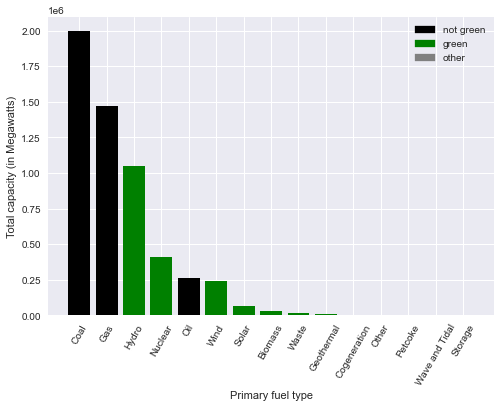

In [14]:
# https://stackoverflow.com/questions/57340415/matplotlib-bar-plot-add-legend-from-categories-dataframe-column
import matplotlib.pyplot as plt
plt.style.use('seaborn')
colors = {'not green':"black", 'green':"green", 'other':"grey"}  
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
c = capacity['green'].apply(lambda x: colors[x])
plt.bar(capacity['primary_fuel'], capacity['capacity_sum'], color=c, label=colors)
plt.xticks(rotation = 60)
plt.xlabel("Primary fuel type")
plt.ylabel("Total capacity (in Megawatts)", rotation = 90)
plt.legend(handles, labels)

## 2. How many new powerplants in total and of each new fuel type per year (or per n years)

In [15]:
# https://stackoverflow.com/questions/11285613/selecting-multiple-columns-in-a-pandas-dataframe
newpp = df_all[['gppd_idnr','country','primary_fuel','commissioning_year']]
newpp = newpp.dropna()
newpp

,gppd_idnr,country,primary_fuel,commissioning_year
7,WRI1002169,ALB,Hydro,1965.0
8,WRI1002170,ALB,Hydro,1978.0
9,WRI1002171,ALB,Hydro,1985.0
10,WRI1002172,ALB,Hydro,1951.0
11,WRI1002173,ALB,Hydro,1963.0
...,...,...,...,...
29892,WRI1022447,YEM,Gas,2009.0
29893,WRI1022442,YEM,Oil,1981.0
29895,WRI1000020,ZMB,Hydro,1978.0
29896,WRI1000022,ZMB,Hydro,1971.0


In [16]:
newpp['commissioning_year'].unique()

array([1965.      , 1978.      , 1985.      , ..., 1972.049327,
       2001.610205, 2013.77551 ])

In [17]:
# We see that the years can sometimes have decimals, which is nonsensical. Therefore:
newpp['commissioning_year'] = newpp['commissioning_year'].map(int)
newpp['commissioning_year'].unique()

array([1965, 1978, 1985, 1951, 1963, 1958, 1971, 2010, 1980, 2016, 2009,
       2013, 2015, 1988, 1952, 1974, 2007, 2006, 2011, 1975, 1981, 1997,
       1993, 1982, 1987, 1969, 2003, 1977, 2014, 1966, 2002, 1996, 1953,
       1990, 1999, 2008, 1954, 1983, 1943, 1995, 1998, 1967, 1989, 1972,
       1984, 1956, 1950, 1970, 1957, 1968, 2001, 1979, 1962, 1986, 1976,
       2012, 1944, 1991, 1960, 1925, 1964, 1949, 1994, 1926, 1947, 1931,
       2005, 1992, 1946, 1930, 2000, 1973, 1959, 2017, 1912, 1900, 2004,
       1905, 1936, 1940, 1914, 1924, 1955, 1919, 1928, 1911, 1935, 1939,
       1961, 1938, 1941, 1948, 1937, 2018, 1945, 1933, 1932, 1921, 1929,
       1917, 1934, 1910, 1908, 1927, 1922, 1942, 1915, 1920, 1923, 1913,
       1906, 1916, 1907, 1918, 1909, 1902, 1903, 1904, 1901, 1896, 1899],
      dtype=int64)

In [18]:
newyear = newpp.groupby('commissioning_year')
newyear.describe()

gppd_idnr                         country                   \
                       count unique         top freq   count unique  top freq   
commissioning_year                                                              
1896                       1      1  USA0003651    1       1      1  USA    1   
1899                       1      1  USA0000361    1       1      1  USA    1   
1900                       6      6  BRA0031496    1       6      4  BRA    2   
1901                       2      2  USA0006231    1       2      2  USA    1   
1902                       4      4  USA0000214    1       4      2  CHE    3   
...                      ...    ...         ...  ...     ...    ...  ...  ...   
2014                     819    819  BRA0032957    1     819     39  USA  417   
2015                     805    805  BRA0031702    1     805     38  USA  424   
2016                     860    860  USA0060353    1     860     35  USA  529   
2017                     715    715  WRI1030487    1     715     21  USA  613   
2018                     175    175  USA0061303    1     175     11  USA  156   

                   primary_fuel                     
                          count unique    top freq  
commissioning_year                                  
1896                          1      1  Hydro    1  
1899                          1      1  Hydro    1  
1900                          6      3  Hydro    3  
1901                          2      1  Hydro    2  
1902                          4      1  Hydro    4  
...                         ...    ...    ...  ...  
2014                        819     11  Solar  368  
2015                        805     12  Solar  335  
2016                        860     10  Solar  448  
2017                        715     11  Solar  491  
2018                        175      7  Solar  142  

[121 rows x 12 columns]

In [19]:
# https://towardsdatascience.com/pandas-groupby-aggregate-transform-filter-c95ba3444bbb
nycount = newyear.size()
nycount

commissioning_year
1896      1
1899      1
1900      6
1901      2
1902      4
       ... 
2014    819
2015    805
2016    860
2017    715
2018    175
Length: 121, dtype: int64

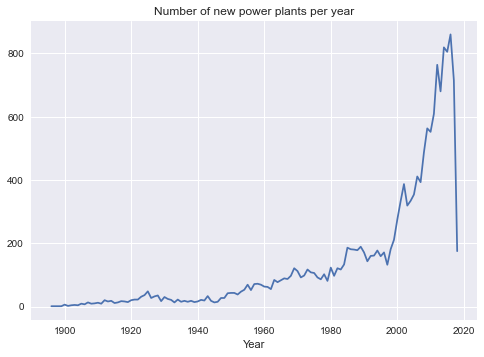

In [20]:
nycountplot = nycount.plot(title = "Number of new power plants per year", xlabel = "Year")

In [21]:
# However, the energy output data is available only until 2017. 
# We also see a suspicious drop in the amount of new power plants from 2017 to 2018.
# The latest technical note for the dataset was published in 2019, 
# but almost all sources used are from 2018 (also powerplant data sources).
# It seems likely that the dataset does not represent the number of new powerplants in 2018 adequately.
# Therefore, we only include the data from 1896-2017:
maskyear = newpp["commissioning_year"] != 2018
newpp = newpp[maskyear]
newyear = newpp.groupby('commissioning_year')
nycount = newyear.size()
nycount

commissioning_year
1896      1
1899      1
1900      6
1901      2
1902      4
       ... 
2013    680
2014    819
2015    805
2016    860
2017    715
Length: 120, dtype: int64

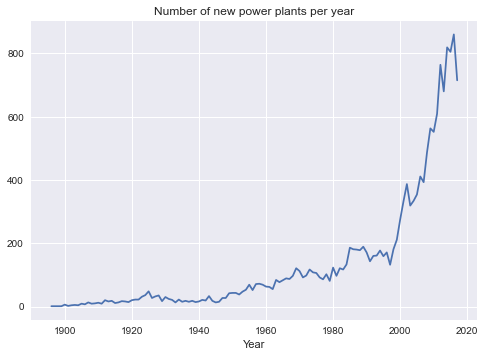

In [22]:
nycountplot = nycount.plot(title = "Number of new power plants per year", xlabel = "Year")

<AxesSubplot:xlabel='Year'>

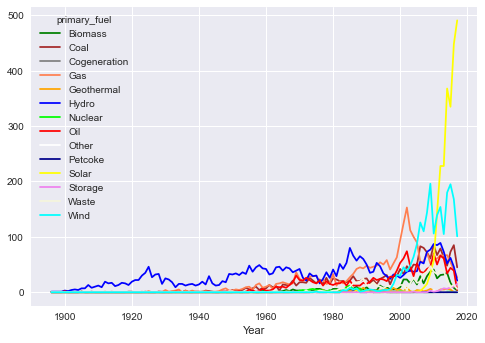

In [23]:
# Exploring which fuel types are responsible for the spikes:

# https://stackoverflow.com/questions/53997862/pandas-groupby-two-columns-and-plot
# https://matplotlib.org/stable/tutorials/colors/colors.html
pd.crosstab(newpp["commissioning_year"],newpp["primary_fuel"]).plot(xlabel = "Year", color = ['green','brown','grey','coral','orange','blue','lime','red','white','darkblue','yellow','violet','beige','cyan'])

In [24]:
# Exploring which countries are responsible for the spike in solar power plants:
masksolar = newpp["primary_fuel"] == 'Solar'
newsolar = newpp[masksolar]
newsolar

,gppd_idnr,country,primary_fuel,commissioning_year
1549,BRA0031760,BRA,Solar,2014
2417,BRA0031430,BRA,Solar,2014
3093,BRA0030060,BRA,Solar,2011
6460,WRI1029337,CHN,Solar,2011
8487,WRI1030005,DNK,Solar,2016
...,...,...,...,...
29505,USA0057422,USA,Solar,2011
29512,USA0060107,USA,Solar,2015
29521,USA0060980,USA,Solar,2016
29522,USA0061257,USA,Solar,2017


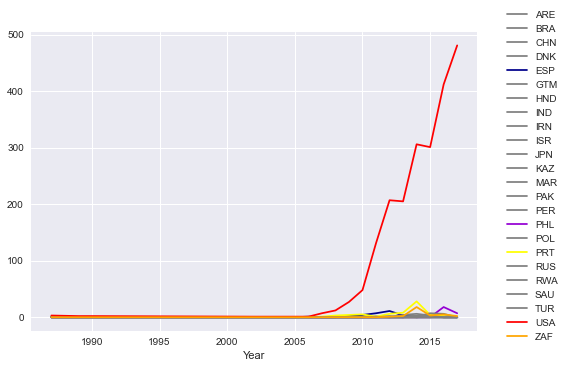

In [25]:
pd.crosstab(newsolar["commissioning_year"],newsolar["country"]).plot(xlabel = "Year", color = ['grey','grey','grey','grey','darkblue','grey','grey','grey','grey','grey','grey','grey','grey','grey','grey','darkviolet','grey','yellow','grey','grey','grey','grey','red','orange'])
plt.legend( bbox_to_anchor=(1.2,1.1))

# karina - analysis on complete time series

## 3. Hypothesis testing - has there been an increase in energy output between years (2013-2017)?

In [26]:
dfc = df_time_series_complete
dfc1=dfc[["generation_gwh_2013","generation_gwh_2014","generation_gwh_2015","generation_gwh_2016","generation_gwh_2017"]]
dfc1.describe()

,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
count,6817.000000,6817.000000,6817.000000,6817.000000,6817.000000
mean,685.020952,688.554481,698.562305,676.278993,726.536342
std,2261.173937,2294.095823,2304.707671,2279.047703,2341.640875
min,-947.600000,-989.619000,-864.428000,-768.620000,-934.944000
25%,2.200000,2.632000,2.511000,2.490000,4.348000
50%,27.118000,26.836320,26.576000,25.858000,36.726000
75%,250.443889,247.330068,251.239000,246.354000,283.000000
max,31431.080000,32320.917000,32525.595000,32377.477000,35116.000000


In [27]:
dfc1.corr()

,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
generation_gwh_2013,1.000000,0.962601,0.940071,0.913186,0.920023
generation_gwh_2014,0.962601,1.000000,0.972677,0.945576,0.932240
generation_gwh_2015,0.940071,0.972677,1.000000,0.967203,0.950799
generation_gwh_2016,0.913186,0.945576,0.967203,1.000000,0.954612
generation_gwh_2017,0.920023,0.932240,0.950799,0.954612,1.000000


Text(0, 0.5, 'Energy output (in GWh)')

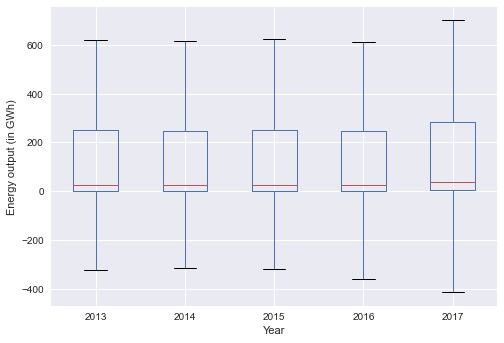

In [28]:
# It seems like there is a slight rise in energy production from 2013 to 2017, judging by the mean and max values above.

# https://stackoverflow.com/questions/11285613/selecting-multiple-columns-in-a-pandas-dataframe
# https://stackoverflow.com/questions/49554139/boxplot-of-multiple-columns-of-a-pandas-dataframe-on-the-same-figure-seaborn
dfc1.boxplot(showfliers=False) # https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.boxplot.html
plt.xticks([1,2,3,4,5], [2013,2014,2015,2016,2017])
plt.xlabel("Year")
plt.ylabel("Energy output (in GWh)")

Text(0, 0.5, 'Energy output (in GWh)')

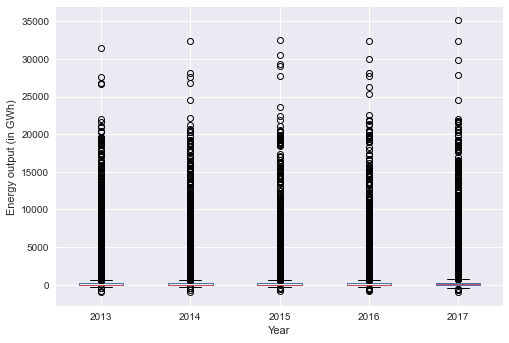

In [29]:
# Just to show how the boxplots look like with outliers:

# https://stackoverflow.com/questions/11285613/selecting-multiple-columns-in-a-pandas-dataframe
# https://stackoverflow.com/questions/49554139/boxplot-of-multiple-columns-of-a-pandas-dataframe-on-the-same-figure-seaborn
dfc1.boxplot(showfliers=True) # https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.boxplot.html
plt.xticks([1,2,3,4,5], [2013,2014,2015,2016,2017])
plt.xlabel("Year")
plt.ylabel("Energy output (in GWh)")

In [30]:
# However, the boxplots do not seem to show a significant difference.
# So, is there an increase in energy output throughout the years?
# Let's use ANOVA hypothesis testing as outlined in the hypothesis testing lecture from the Data Analysis course.
# So the null hypothesis is that the mean is similar for all 5 years (2013,2014,2015,2016 and 2017)
# And the alternative hypothesis is that there is a difference between the means.
from scipy.stats import f_oneway
f_oneway(dfc1["generation_gwh_2013"],dfc1["generation_gwh_2014"],dfc1["generation_gwh_2015"],dfc1["generation_gwh_2016"],dfc1["generation_gwh_2017"])

F_onewayResult(statistic=0.48443102568775964, pvalue=0.7472116879358542)

In [31]:
# We see that the pvalue is quite high, and definitely bigger than the standard 0.05 value.
# Therefore, we can conclude that the difference in the means between years is most likely due to chance,
# and that the difference in the means between years is not statistically significant.

# Let's see if there is a difference year-by-year using the t-test 
# as outlined in the hypothesis testing lecture from the Data Analysis course:

In [32]:
from scipy.stats import ttest_ind
t34, pval34 = ttest_ind(dfc1["generation_gwh_2013"],dfc1["generation_gwh_2014"])
print(t34, pval34)

-0.09057218720579535 0.9278338631635166


In [33]:
t45, pval45= ttest_ind(dfc1["generation_gwh_2014"],dfc1["generation_gwh_2015"])
print(t45, pval45)

-0.25410037001138785 0.7994218499512872


In [34]:
t56, pval56 = ttest_ind(dfc1["generation_gwh_2015"],dfc1["generation_gwh_2016"])
print(t56, pval56)

0.5676271408477459 0.5702975217343101


In [35]:
t67, pval67 = ttest_ind(dfc1["generation_gwh_2016"],dfc1["generation_gwh_2017"])
print(t67, pval67)

-1.2698858284702281 0.20414697778985053


## Solar and Wind

In [36]:
# Now, it would be interesting to look specifically at Solar and Wind energy outputs,
# as from the plots above we see that there have been quite a lot of new power plants of these fuel types.
dfc1=dfc[["primary_fuel","generation_gwh_2013","generation_gwh_2014","generation_gwh_2015","generation_gwh_2016","generation_gwh_2017"]]
dfc1["primary_fuel"].unique()

array(['Wind', 'Gas', 'Waste', 'Hydro', 'Coal', 'Oil', 'Solar', 'Nuclear',
       'Biomass', 'Cogeneration', 'Geothermal', 'Petcoke', 'Other',
       'Storage'], dtype=object)

In [37]:
solar= dfc1[dfc1["primary_fuel"].str.contains('Solar')==True] 
solar["primary_fuel"].unique()
solar.describe()

,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,14.176807,23.480800,25.716058,25.673569,25.304770
std,45.808663,86.351426,97.053440,95.958802,95.268087
min,-0.116000,-0.064000,0.000000,0.000000,-0.394000
25%,1.648575,2.133587,2.145498,2.269750,2.084500
50%,2.812500,3.854000,4.003000,4.190500,3.851500
75%,8.333750,10.263250,10.188000,10.652750,10.362750
max,675.525000,1105.857000,1301.337000,1265.760000,1237.532000


In [38]:
from scipy.stats import f_oneway
f_oneway(solar["generation_gwh_2013"],solar["generation_gwh_2014"],solar["generation_gwh_2015"],solar["generation_gwh_2016"],solar["generation_gwh_2017"])

F_onewayResult(statistic=2.01529196320594, pvalue=0.0896483294449274)

In [39]:
# p-value is pretty small, but still a bit bigger than 0.05. Let's look year-by-year:
t34, pval34 = ttest_ind(solar["generation_gwh_2013"],solar["generation_gwh_2014"])
print(t34, pval34)

-2.3585122543025503 0.01850459918420546


In [40]:
t45, pval45= ttest_ind(solar["generation_gwh_2014"],solar["generation_gwh_2015"])
print(t45, pval45)

-0.4263614978350083 0.6699193003742298


In [41]:
t56, pval56 = ttest_ind(solar["generation_gwh_2015"],solar["generation_gwh_2016"])
print(t56, pval56)

0.007713999875312193 0.9938464346216915


In [42]:
t67, pval67 = ttest_ind(solar["generation_gwh_2016"],solar["generation_gwh_2017"])
print(t67, pval67)

0.06758297931762636 0.9461286246538121


<AxesSubplot:xlabel='Year'>

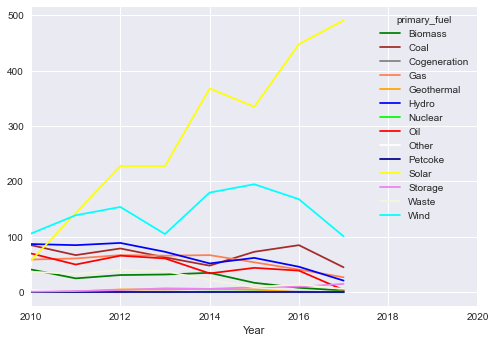

In [43]:
# So only for 2013-2014, the difference in mean could have been statistically significant.
# This is interesting, considering how many new power plants there have been built in that period.
# However, this discrepancy can be due to the fact that these new power plants were built in other 
# countries, which are not in the complete time series dataset (which includes only power plants in USA, India, Australia).

# https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.ylim.html
# https://stackoverflow.com/questions/53997862/pandas-groupby-two-columns-and-plot
# https://matplotlib.org/stable/tutorials/colors/colors.html
pd.crosstab(newpp["commissioning_year"],newpp["primary_fuel"]).plot(xlim = (2010,2020), xlabel = "Year", color = ['green','brown','grey','coral','orange','blue','lime','red','white','darkblue','yellow','violet','beige','cyan'])

In [44]:
wind = dfc1[dfc1["primary_fuel"].str.contains('Wind')==True] 
wind["primary_fuel"].unique()
wind.describe()

,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
count,815.000000,815.000000,815.000000,815.000000,815.000000
mean,212.506884,225.655921,209.646224,216.898017,211.177503
std,242.456165,259.101596,236.785529,245.592186,240.213925
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24.775500,24.560000,23.010000,22.551000,21.528000
50%,136.132000,147.864000,140.907000,145.288000,144.709000
75%,332.800500,353.121000,326.288000,332.927500,319.801500
max,1983.817000,2309.100000,1965.895000,2159.583000,1972.964000


In [45]:
from scipy.stats import f_oneway
f_oneway(wind["generation_gwh_2013"],wind["generation_gwh_2014"],wind["generation_gwh_2015"],wind["generation_gwh_2016"],wind["generation_gwh_2017"])

F_onewayResult(statistic=0.5653461294129226, pvalue=0.6878214078615505)

In [46]:
t34, pval34 = ttest_ind(wind["generation_gwh_2013"],wind["generation_gwh_2014"])
print(t34, pval34)

-1.0578589477547202 0.29027669098917025


In [47]:
t45, pval45= ttest_ind(wind["generation_gwh_2014"],wind["generation_gwh_2015"])
print(t45, pval45)

1.3021312251271024 0.1930557239637976


In [48]:
t56, pval56 = ttest_ind(wind["generation_gwh_2015"],wind["generation_gwh_2016"])
print(t56, pval56)

-0.6068475692598173 0.5440366937343956


In [49]:
t67, pval67 = ttest_ind(wind["generation_gwh_2016"],wind["generation_gwh_2017"])
print(t67, pval67)

0.47537824151956065 0.6345811733992572


In [50]:
# Not statistically significant.

## 4. Stacked barplot energy output per fuel type (separate for each country)

In [51]:
dfc2=dfc[["country","primary_fuel","generation_gwh_2013","generation_gwh_2014","generation_gwh_2015","generation_gwh_2016","generation_gwh_2017"]]
dfc2["country"].unique()

array(['AUS', 'IND', 'USA'], dtype=object)

In [52]:
aus = dfc2[dfc2["country"].str.contains('AUS')==True] 
ind = dfc2[dfc2["country"].str.contains('IND')==True] 
usa = dfc2[dfc2["country"].str.contains('USA')==True] 

In [53]:
ausfuel = aus.groupby("primary_fuel")
# https://towardsdatascience.com/pandas-groupby-aggregate-transform-filter-c95ba3444bbb
ausfuel = ausfuel.agg(**{'generation_2013_sum': pd.NamedAgg(column='generation_gwh_2013', aggfunc='sum'), 'generation_2014_sum': pd.NamedAgg(column='generation_gwh_2014', aggfunc='sum'),'generation_2015_sum': pd.NamedAgg(column='generation_gwh_2015', aggfunc='sum'),'generation_2016_sum': pd.NamedAgg(column='generation_gwh_2016', aggfunc='sum'),'generation_2017_sum': pd.NamedAgg(column='generation_gwh_2017', aggfunc='sum')})
ausfuel = ausfuel.sort_values(by='generation_2013_sum', ascending = False)
ausfuel = ausfuel.transpose() # https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.transpose.html
ausfuel = ausfuel.reset_index()
ausfuel

primary_fuel,index,Coal,Gas,Hydro,Wind,Waste,Oil,Solar
0,generation_2013_sum,133964.440560,32008.918612,12961.368611,7263.585833,699.088056,106.010833,0.847778
1,generation_2014_sum,126699.720005,31765.243333,14298.104166,8428.466111,696.600833,47.653333,0.845278
2,generation_2015_sum,138685.592778,28785.228889,10563.897500,7756.222500,683.047222,61.086944,0.881111
3,generation_2016_sum,141270.820001,26505.675000,10301.105556,7805.489444,620.079167,87.641944,0.956389
4,generation_2017_sum,140683.171114,25301.246111,10570.422500,7276.498889,647.396667,100.602500,0.966944


Text(0.5, 1.0, 'Australia')

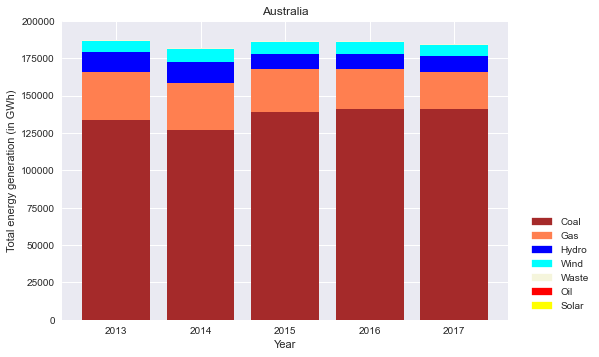

In [54]:
# https://stackoverflow.com/questions/44309507/stacked-bar-plot-using-matplotlib
p1 = plt.bar(ausfuel["index"], ausfuel["Coal"], color='brown')
p2 = plt.bar(ausfuel["index"], ausfuel["Gas"] ,bottom = ausfuel["Coal"], color='coral')
p3 = plt.bar(ausfuel["index"], ausfuel["Hydro"],
             bottom=[sum(x) for x in zip(ausfuel["Coal"],ausfuel["Gas"])], color='blue')
p4 = plt.bar(ausfuel["index"], ausfuel["Wind"],
             bottom=[sum(x) for x in zip(ausfuel["Coal"],ausfuel["Gas"],ausfuel["Hydro"])],
             color='cyan')
p5 = plt.bar(ausfuel["index"], ausfuel["Waste"],
             bottom=[sum(x) for x in zip(ausfuel["Coal"],ausfuel["Gas"],ausfuel["Hydro"], ausfuel["Wind"])],
             color='beige')
p6 = plt.bar(ausfuel["index"], ausfuel["Oil"],
             bottom=[sum(x) for x in zip(ausfuel["Coal"],ausfuel["Gas"],ausfuel["Hydro"], ausfuel["Wind"],ausfuel["Waste"])],
             color='red')
p7 = plt.bar(ausfuel["index"], ausfuel["Solar"],
             bottom=[sum(x) for x in zip(ausfuel["Coal"],ausfuel["Gas"],ausfuel["Hydro"], ausfuel["Wind"],ausfuel["Waste"],ausfuel["Oil"])],
             color='yellow')
plt.ylim(0,200000)
plt.xticks([0,1,2,3,4], [2013,2014,2015,2016,2017])

# https://stackoverflow.com/questions/57340415/matplotlib-bar-plot-add-legend-from-categories-dataframe-column
colors = {'Coal':"brown", 'Gas':"coral", 'Hydro':"blue","Wind":"cyan", "Waste":"beige","Oil":"red","Solar":"yellow"}  
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html
# https://stackoverflow.com/questions/4700614/how-to-put-the-legend-out-of-the-plot
plt.legend(handles, labels, loc = 'lower right', bbox_to_anchor=(1.2, 0))
plt.xlabel("Year")
plt.ylabel("Total energy generation (in GWh)")
plt.title("Australia")

In [55]:
indfuel = ind.groupby("primary_fuel")
# https://towardsdatascience.com/pandas-groupby-aggregate-transform-filter-c95ba3444bbb
indfuel = indfuel.agg(**{'generation_2013_sum': pd.NamedAgg(column='generation_gwh_2013', aggfunc='sum'), 'generation_2014_sum': pd.NamedAgg(column='generation_gwh_2014', aggfunc='sum'),'generation_2015_sum': pd.NamedAgg(column='generation_gwh_2015', aggfunc='sum'),'generation_2016_sum': pd.NamedAgg(column='generation_gwh_2016', aggfunc='sum'),'generation_2017_sum': pd.NamedAgg(column='generation_gwh_2017', aggfunc='sum')})
indfuel = indfuel.sort_values(by='generation_2013_sum', ascending = False)
indfuel = indfuel.transpose() # https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.transpose.html
indfuel = indfuel.reset_index()
indfuel

primary_fuel,index,Coal,Hydro,Gas,Nuclear,Oil
0,generation_2013_sum,673281.215887,134730.860500,43227.798060,30408.588,1472.718140
1,generation_2014_sum,757033.305820,129549.065670,40087.662382,30197.570,1545.684590
2,generation_2015_sum,776527.285698,118048.585625,44681.952652,31852.000,161.296300
3,generation_2016_sum,771422.520922,114584.490540,45975.321344,28456.850,41.457540
4,generation_2017_sum,788726.967779,113119.421695,46843.590481,26692.920,1.172299


Text(0.5, 1.0, 'India')

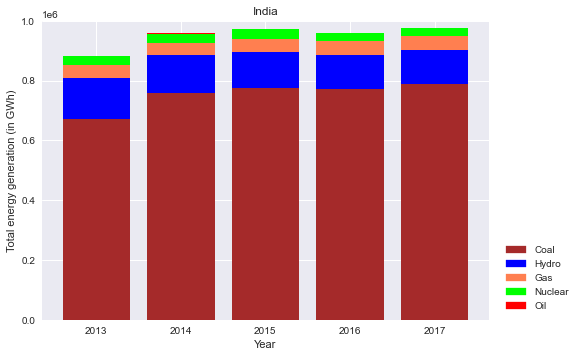

In [56]:
# https://stackoverflow.com/questions/44309507/stacked-bar-plot-using-matplotlib
p1 = plt.bar(indfuel["index"], indfuel["Coal"], color='brown')
p2 = plt.bar(indfuel["index"], indfuel["Hydro"] ,bottom = indfuel["Coal"], color='blue')
p3 = plt.bar(indfuel["index"], indfuel["Gas"],
             bottom=[sum(x) for x in zip(indfuel["Coal"],indfuel["Hydro"])], color='coral')
p4 = plt.bar(indfuel["index"], indfuel["Nuclear"],
             bottom=[sum(x) for x in zip(indfuel["Coal"],indfuel["Hydro"],indfuel["Gas"])],
             color='lime')
p5 = plt.bar(indfuel["index"], indfuel["Oil"],
             bottom=[sum(x) for x in zip(indfuel["Coal"],indfuel["Hydro"],indfuel["Gas"], indfuel["Nuclear"])],
             color='red')
plt.ylim(0,1000000)
plt.xticks([0,1,2,3,4], [2013,2014,2015,2016,2017])

# https://stackoverflow.com/questions/57340415/matplotlib-bar-plot-add-legend-from-categories-dataframe-column
colors = {'Coal':"brown", 'Hydro':"blue", 'Gas':"coral", "Nuclear":"lime","Oil":"red"}  
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html
# https://stackoverflow.com/questions/4700614/how-to-put-the-legend-out-of-the-plot
plt.legend(handles, labels, loc = 'lower right', bbox_to_anchor=(1.2, 0))
plt.xlabel("Year")
plt.ylabel("Total energy generation (in GWh)")
plt.title("India")

In [57]:
usafuel = usa.groupby("primary_fuel")
# https://towardsdatascience.com/pandas-groupby-aggregate-transform-filter-c95ba3444bbb
usafuel = usafuel.agg(**{'generation_2013_sum': pd.NamedAgg(column='generation_gwh_2013', aggfunc='sum'), 'generation_2014_sum': pd.NamedAgg(column='generation_gwh_2014', aggfunc='sum'),'generation_2015_sum': pd.NamedAgg(column='generation_gwh_2015', aggfunc='sum'),'generation_2016_sum': pd.NamedAgg(column='generation_gwh_2016', aggfunc='sum'),'generation_2017_sum': pd.NamedAgg(column='generation_gwh_2017', aggfunc='sum')})
usafuel = usafuel.sort_values(by='generation_2013_sum', ascending = False)
usafuel = usafuel.transpose() # https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.transpose.html
usafuel = usafuel.reset_index()
usafuel

primary_fuel,index,Coal,Gas,Nuclear,Hydro,Wind,Waste,Biomass,Geothermal,Oil,Petcoke,Solar,Cogeneration,Storage,Other
0,generation_2013_sum,1.236409e+06,1.035080e+06,789441.28438,262547.91059,165929.52422,37537.028085,22524.019400,15190.41408,9748.595190,9440.433457,8703.71171,2913.223317,2555.109995,1641.563601
1,generation_2014_sum,1.226313e+06,9.888998e+05,794246.38498,252191.26390,175481.10923,39925.469958,22156.103066,15439.06400,10919.740883,8298.017789,14416.36562,2571.369460,1556.706961,1111.788140
2,generation_2015_sum,1.132222e+06,1.152978e+06,800949.65006,242657.66476,163105.44992,38496.968727,23207.512646,15542.93300,8027.793483,7614.145988,15788.77855,2536.329040,6.503000,1158.451570
3,generation_2016_sum,9.893195e+05,1.134830e+06,802618.33799,258460.17483,168966.39450,36514.908848,23486.398373,15485.47000,6459.947419,7927.401354,15762.61528,2525.474050,-52.441000,817.450131
4,generation_2017_sum,1.193689e+06,1.199717e+06,810261.21596,290871.46902,164833.16582,43545.825035,26111.411863,15512.24100,18955.820073,8328.008918,15536.16203,3745.671539,8.609000,1718.162676


Text(0.5, 1.0, 'USA')

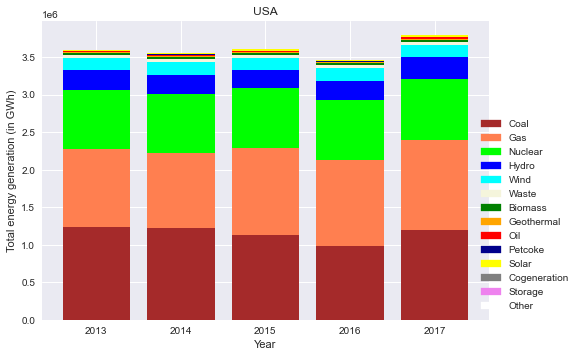

In [58]:
# https://stackoverflow.com/questions/44309507/stacked-bar-plot-using-matplotlib
p1 = plt.bar(usafuel["index"], usafuel["Coal"], color='brown')
p2 = plt.bar(usafuel["index"], usafuel["Gas"] ,bottom = usafuel["Coal"], color='coral')
p3 = plt.bar(usafuel["index"], usafuel["Nuclear"],
             bottom=[sum(x) for x in zip(usafuel["Coal"],usafuel["Gas"])], color='lime')
p4 = plt.bar(usafuel["index"], usafuel["Hydro"],
             bottom=[sum(x) for x in zip(usafuel["Coal"],usafuel["Gas"],usafuel["Nuclear"])],
             color='blue')
p5 = plt.bar(usafuel["index"], usafuel["Wind"],
             bottom=[sum(x) for x in zip(usafuel["Coal"],usafuel["Gas"],usafuel["Nuclear"], usafuel["Hydro"])],
             color='cyan')
p6 = plt.bar(usafuel["index"], usafuel["Waste"],
             bottom=[sum(x) for x in zip(usafuel["Coal"],usafuel["Gas"],usafuel["Nuclear"], usafuel["Hydro"],usafuel["Wind"])],
             color='beige')
p7 = plt.bar(usafuel["index"], usafuel["Biomass"],
             bottom=[sum(x) for x in zip(usafuel["Coal"],usafuel["Gas"],usafuel["Nuclear"], usafuel["Hydro"],usafuel["Wind"],usafuel["Waste"])],
             color='green')
p8 = plt.bar(usafuel["index"], usafuel["Geothermal"],
             bottom=[sum(x) for x in zip(usafuel["Coal"],usafuel["Gas"],usafuel["Nuclear"], usafuel["Hydro"],usafuel["Wind"],usafuel["Waste"],usafuel["Biomass"])],
             color='orange')
p9 = plt.bar(usafuel["index"], usafuel["Oil"],
             bottom=[sum(x) for x in zip(usafuel["Coal"],usafuel["Gas"],usafuel["Nuclear"], usafuel["Hydro"],usafuel["Wind"],usafuel["Waste"],usafuel["Biomass"],usafuel["Geothermal"])],
             color='red')
p10 = plt.bar(usafuel["index"], usafuel["Petcoke"],
             bottom=[sum(x) for x in zip(usafuel["Coal"],usafuel["Gas"],usafuel["Nuclear"], usafuel["Hydro"],usafuel["Wind"],usafuel["Waste"],usafuel["Biomass"],usafuel["Geothermal"],usafuel["Oil"])],
             color='darkblue')
p11 = plt.bar(usafuel["index"], usafuel["Solar"],
             bottom=[sum(x) for x in zip(usafuel["Coal"],usafuel["Gas"],usafuel["Nuclear"], usafuel["Hydro"],usafuel["Wind"],usafuel["Waste"],usafuel["Biomass"],usafuel["Geothermal"],usafuel["Oil"],usafuel["Petcoke"])],
             color='yellow')
p12 = plt.bar(usafuel["index"], usafuel["Cogeneration"],
             bottom=[sum(x) for x in zip(usafuel["Coal"],usafuel["Gas"],usafuel["Nuclear"], usafuel["Hydro"],usafuel["Wind"],usafuel["Waste"],usafuel["Biomass"],usafuel["Geothermal"],usafuel["Oil"],usafuel["Petcoke"],usafuel["Solar"])],
             color='grey')
p13 = plt.bar(usafuel["index"], usafuel["Storage"],
             bottom=[sum(x) for x in zip(usafuel["Coal"],usafuel["Gas"],usafuel["Nuclear"], usafuel["Hydro"],usafuel["Wind"],usafuel["Waste"],usafuel["Biomass"],usafuel["Geothermal"],usafuel["Oil"],usafuel["Petcoke"],usafuel["Solar"],usafuel["Cogeneration"])],
             color='violet')
p14 = plt.bar(usafuel["index"], usafuel["Other"],
             bottom=[sum(x) for x in zip(usafuel["Coal"],usafuel["Gas"],usafuel["Nuclear"], usafuel["Hydro"],usafuel["Wind"],usafuel["Waste"],usafuel["Biomass"],usafuel["Geothermal"],usafuel["Oil"],usafuel["Petcoke"],usafuel["Solar"],usafuel["Cogeneration"],usafuel["Storage"])],
             color='white')
plt.xticks([0,1,2,3,4], [2013,2014,2015,2016,2017])

# https://stackoverflow.com/questions/57340415/matplotlib-bar-plot-add-legend-from-categories-dataframe-column
colors = {'Coal':"brown", 'Gas':"coral", "Nuclear":"lime", "Hydro":"blue","Wind":"cyan","Waste":"beige","Biomass":"green","Geothermal":"orange","Oil":"red","Petcoke":"darkblue","Solar":"yellow","Cogeneration":"grey","Storage":"violet","Other":"white"}  
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html
# https://stackoverflow.com/questions/4700614/how-to-put-the-legend-out-of-the-plot
plt.legend(handles, labels, loc = 'lower right', bbox_to_anchor=(1.2, 0))
plt.xlabel("Year")
plt.ylabel("Total energy generation (in GWh)")
plt.title("USA")

## 5. Line plot: ratio of energy output sustainable fuel types over total energy output per year

In [59]:
ausfuel

primary_fuel,index,Coal,Gas,Hydro,Wind,Waste,Oil,Solar
0,generation_2013_sum,133964.440560,32008.918612,12961.368611,7263.585833,699.088056,106.010833,0.847778
1,generation_2014_sum,126699.720005,31765.243333,14298.104166,8428.466111,696.600833,47.653333,0.845278
2,generation_2015_sum,138685.592778,28785.228889,10563.897500,7756.222500,683.047222,61.086944,0.881111
3,generation_2016_sum,141270.820001,26505.675000,10301.105556,7805.489444,620.079167,87.641944,0.956389
4,generation_2017_sum,140683.171114,25301.246111,10570.422500,7276.498889,647.396667,100.602500,0.966944


In [60]:
# https://stackoverflow.com/questions/34023918/make-new-column-in-panda-dataframe-by-adding-values-from-other-columns
ausfuel['green'] = ausfuel["Hydro"]+ausfuel["Wind"]+ausfuel["Waste"]+ausfuel["Solar"]
ausfuel['all'] = ausfuel[list(ausfuel.columns)].sum(axis=1)
ausfuel['greenpercent'] = ausfuel['green']*100/ausfuel['all']
ausfuel

primary_fuel,index,Coal,Gas,Hydro,Wind,Waste,Oil,Solar,green,all,greenpercent
0,generation_2013_sum,133964.440560,32008.918612,12961.368611,7263.585833,699.088056,106.010833,0.847778,20924.890278,207929.150560,10.063471
1,generation_2014_sum,126699.720005,31765.243333,14298.104166,8428.466111,696.600833,47.653333,0.845278,23424.016388,205360.649448,11.406283
2,generation_2015_sum,138685.592778,28785.228889,10563.897500,7756.222500,683.047222,61.086944,0.881111,19004.048333,205540.005277,9.245912
3,generation_2016_sum,141270.820001,26505.675000,10301.105556,7805.489444,620.079167,87.641944,0.956389,18727.630556,205319.398057,9.121218
4,generation_2017_sum,140683.171114,25301.246111,10570.422500,7276.498889,647.396667,100.602500,0.966944,18495.285000,203075.589725,9.107587


Text(0.5, 1.0, 'Australia')

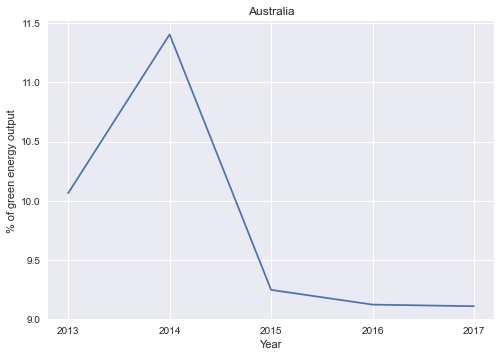

In [61]:
ausfuel["greenpercent"].plot()
plt.xticks([0,1,2,3,4], [2013,2014,2015,2016,2017])
plt.xlabel("Year")
plt.ylabel("% of green energy output")
plt.title("Australia")

In [62]:
indfuel

primary_fuel,index,Coal,Hydro,Gas,Nuclear,Oil
0,generation_2013_sum,673281.215887,134730.860500,43227.798060,30408.588,1472.718140
1,generation_2014_sum,757033.305820,129549.065670,40087.662382,30197.570,1545.684590
2,generation_2015_sum,776527.285698,118048.585625,44681.952652,31852.000,161.296300
3,generation_2016_sum,771422.520922,114584.490540,45975.321344,28456.850,41.457540
4,generation_2017_sum,788726.967779,113119.421695,46843.590481,26692.920,1.172299


In [63]:
# https://stackoverflow.com/questions/34023918/make-new-column-in-panda-dataframe-by-adding-values-from-other-columns
indfuel['green'] = indfuel["Hydro"]+indfuel["Nuclear"]
indfuel['all'] = indfuel[list(indfuel.columns)].sum(axis=1)
indfuel['greenpercent'] = indfuel['green']*100/indfuel['all']
indfuel

primary_fuel,index,Coal,Hydro,Gas,Nuclear,Oil,green,all,greenpercent
0,generation_2013_sum,673281.215887,134730.860500,43227.798060,30408.588,1472.718140,165139.448500,1.048261e+06,15.753663
1,generation_2014_sum,757033.305820,129549.065670,40087.662382,30197.570,1545.684590,159746.635670,1.118160e+06,14.286564
2,generation_2015_sum,776527.285698,118048.585625,44681.952652,31852.000,161.296300,149900.585625,1.121172e+06,13.369994
3,generation_2016_sum,771422.520922,114584.490540,45975.321344,28456.850,41.457540,143041.340540,1.103522e+06,12.962256
4,generation_2017_sum,788726.967779,113119.421695,46843.590481,26692.920,1.172299,139812.341695,1.115196e+06,12.537015


Text(0.5, 1.0, 'India')

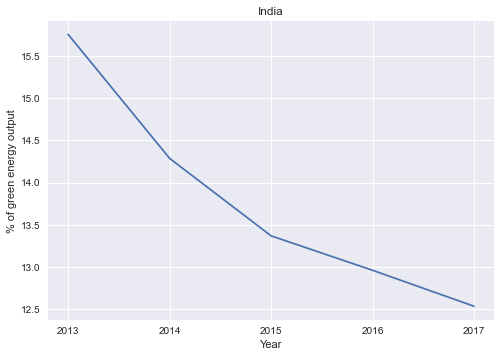

In [64]:
indfuel["greenpercent"].plot()
plt.xticks([0,1,2,3,4], [2013,2014,2015,2016,2017])
plt.xlabel("Year")
plt.ylabel("% of green energy output")
plt.title("India")

In [65]:
usafuel

primary_fuel,index,Coal,Gas,Nuclear,Hydro,Wind,Waste,Biomass,Geothermal,Oil,Petcoke,Solar,Cogeneration,Storage,Other
0,generation_2013_sum,1.236409e+06,1.035080e+06,789441.28438,262547.91059,165929.52422,37537.028085,22524.019400,15190.41408,9748.595190,9440.433457,8703.71171,2913.223317,2555.109995,1641.563601
1,generation_2014_sum,1.226313e+06,9.888998e+05,794246.38498,252191.26390,175481.10923,39925.469958,22156.103066,15439.06400,10919.740883,8298.017789,14416.36562,2571.369460,1556.706961,1111.788140
2,generation_2015_sum,1.132222e+06,1.152978e+06,800949.65006,242657.66476,163105.44992,38496.968727,23207.512646,15542.93300,8027.793483,7614.145988,15788.77855,2536.329040,6.503000,1158.451570
3,generation_2016_sum,9.893195e+05,1.134830e+06,802618.33799,258460.17483,168966.39450,36514.908848,23486.398373,15485.47000,6459.947419,7927.401354,15762.61528,2525.474050,-52.441000,817.450131
4,generation_2017_sum,1.193689e+06,1.199717e+06,810261.21596,290871.46902,164833.16582,43545.825035,26111.411863,15512.24100,18955.820073,8328.008918,15536.16203,3745.671539,8.609000,1718.162676


In [66]:
# https://stackoverflow.com/questions/34023918/make-new-column-in-panda-dataframe-by-adding-values-from-other-columns
usafuel['green'] = usafuel["Nuclear"]+usafuel["Hydro"]+usafuel["Wind"]+usafuel["Waste"]+usafuel["Biomass"]+usafuel["Geothermal"]+usafuel["Solar"]
usafuel['all'] = usafuel[list(usafuel.columns)].sum(axis=1)
usafuel['greenpercent'] = usafuel['green']*100/usafuel['all']
usafuel

primary_fuel,index,Coal,Gas,Nuclear,Hydro,Wind,Waste,Biomass,Geothermal,Oil,Petcoke,Solar,Cogeneration,Storage,Other,green,all,greenpercent
0,generation_2013_sum,1.236409e+06,1.035080e+06,789441.28438,262547.91059,165929.52422,37537.028085,22524.019400,15190.41408,9748.595190,9440.433457,8703.71171,2913.223317,2555.109995,1641.563601,1.301874e+06,4.901536e+06,26.560527
1,generation_2014_sum,1.226313e+06,9.888998e+05,794246.38498,252191.26390,175481.10923,39925.469958,22156.103066,15439.06400,10919.740883,8298.017789,14416.36562,2571.369460,1556.706961,1111.788140,1.313856e+06,4.867382e+06,26.993070
2,generation_2015_sum,1.132222e+06,1.152978e+06,800949.65006,242657.66476,163105.44992,38496.968727,23207.512646,15542.93300,8027.793483,7614.145988,15788.77855,2536.329040,6.503000,1158.451570,1.299749e+06,4.904041e+06,26.503631
3,generation_2016_sum,9.893195e+05,1.134830e+06,802618.33799,258460.17483,168966.39450,36514.908848,23486.398373,15485.47000,6459.947419,7927.401354,15762.61528,2525.474050,-52.441000,817.450131,1.321294e+06,4.784416e+06,27.616628
4,generation_2017_sum,1.193689e+06,1.199717e+06,810261.21596,290871.46902,164833.16582,43545.825035,26111.411863,15512.24100,18955.820073,8328.008918,15536.16203,3745.671539,8.609000,1718.162676,1.366671e+06,5.159505e+06,26.488421


Text(0.5, 1.0, 'USA')

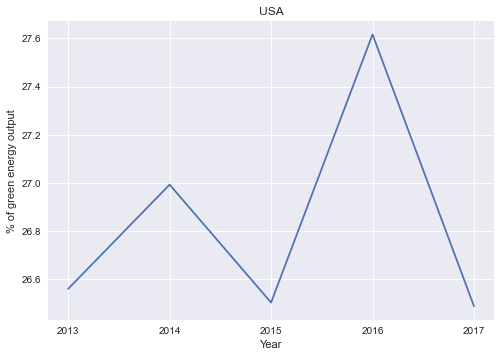

In [67]:
usafuel["greenpercent"].plot()
plt.xticks([0,1,2,3,4], [2013,2014,2015,2016,2017])
plt.xlabel("Year")
plt.ylabel("% of green energy output")
plt.title("USA")

# Ratio green energy estimated output over all estimated output (per country)

In [68]:
# Calculating energy estimated as a mean of actual energy outputs for complete time series dataset:
df_time_series_complete['estimated_generation_gwh'] = (df_time_series_complete['generation_gwh_2013']+df_time_series_complete['generation_gwh_2014']+df_time_series_complete['generation_gwh_2015']+df_time_series_complete['generation_gwh_2016']+df_time_series_complete['generation_gwh_2017'])/5    

<ipython-input-68-0b8655cb741d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_time_series_complete['estimated_generation_gwh'] = (df_time_series_complete['generation_gwh_2013']+df_time_series_complete['generation_gwh_2014']+df_time_series_complete['generation_gwh_2015']+df_time_series_complete['generation_gwh_2016']+df_time_series_complete['generation_gwh_2017'])/5


In [69]:
df_time_series_complete

,country,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,owner,source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,estimated_generation_gwh
gppd_idnr,,,,,,,,,,,,,,,,,,
AUS0000065,AUS,21.6,-35.0641,117.7977,Wind,NaN,NaN,NaN,NaN,Verve Energy,Australian Renewable Energy Mapping Infrastruc...,NaN,89.595278,102.642778,96.555556,95.872778,85.900278,94.113333
AUS0000264,AUS,55.6,-34.2082,150.7722,Gas,NaN,NaN,NaN,NaN,Energy Developments CSM (NSW) Pty Ltd,Australian Renewable Energy Mapping Infrastruc...,NaN,204.804444,238.294444,163.583611,158.933056,64.534722,166.030056
AUS0000049,AUS,1.1,-33.0250,151.5497,Waste,NaN,NaN,NaN,NaN,LMS Energy Generation Pty Ltd,Australian Renewable Energy Mapping Infrastruc...,NaN,7.655278,8.338611,9.172500,8.830000,8.085556,8.416389
AUS0000081,AUS,94.0,-37.8429,147.5639,Gas,NaN,NaN,NaN,NaN,Alinta DEBO,Australian Renewable Energy Mapping Infrastruc...,NaN,132.456667,154.885556,149.821111,197.540556,168.524444,160.645667
AUS0000113,AUS,3.0,-37.5596,143.8469,Gas,NaN,NaN,NaN,NaN,Ballarat Base Hospital,Australian Renewable Energy Mapping Infrastruc...,NaN,4.194444,4.213056,5.079444,6.831389,6.663333,5.396333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
USA0055392,USA,596.7,42.4776,-87.8950,Gas,Oil,NaN,NaN,2002.333333,Zion Energy LLC,U.S. Energy Information Administration,2017.0,0.000000,63.656000,132.434005,435.493999,462.063000,218.729401
USA0056871,USA,7.0,42.4803,-87.8861,Waste,NaN,NaN,NaN,2003.000000,Energy Developments Inc,U.S. Energy Information Administration,2017.0,43.592000,49.134000,46.699000,42.480000,38.669000,44.114800
USA0001368,USA,18.0,38.2803,-85.7023,Gas,NaN,NaN,NaN,1969.000000,Louisville Gas & Electric Co,U.S. Energy Information Administration,2017.0,0.203000,0.078000,1.058000,0.062000,0.015000,0.283200


In [70]:
# The energy estimations are already provided for the df_estimate dataset and there are no null values in that column:
df_estimate.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21791 entries, WRI1002169 to GEODB0003803
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   21791 non-null  object 
 1   capacity_mw               21791 non-null  float64
 2   latitude                  21791 non-null  float64
 3   longitude                 21791 non-null  float64
 4   primary_fuel              21791 non-null  object 
 5   other_fuel1               400 non-null    object 
 6   other_fuel2               15 non-null     object 
 7   other_fuel3               2 non-null      object 
 8   commissioning_year        8999 non-null   float64
 9   owner                     11944 non-null  object 
 10  source                    21776 non-null  object 
 11  year_of_capacity_data     6516 non-null   float64
 12  generation_gwh_2013       103 non-null    float64
 13  generation_gwh_2014       0 non-null      float64


In [71]:
# The incomplete time series dataset has both those rows where estimation is provided and also those where estimation
# is not provided. We are interested in the latter:
# https://stackoverflow.com/questions/23284409/how-to-subtract-rows-of-one-pandas-data-frame-from-another/38764796
noestimate=df_all[df_all['estimated_generation_gwh'].isnull()]
noestimate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8119 entries, 0 to 29886
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   8119 non-null   object 
 1   gppd_idnr                 8119 non-null   object 
 2   capacity_mw               8119 non-null   float64
 3   latitude                  8119 non-null   float64
 4   longitude                 8119 non-null   float64
 5   primary_fuel              8119 non-null   object 
 6   other_fuel1               1563 non-null   object 
 7   other_fuel2               288 non-null    object 
 8   other_fuel3               102 non-null    object 
 9   commissioning_year        7304 non-null   float64
 10  owner                     7587 non-null   object 
 11  source                    8119 non-null   object 
 12  year_of_capacity_data     7227 non-null   float64
 13  generation_gwh_2013       6893 non-null   float64
 14  generat

In [72]:
# We calculate the mean by transposing the matrix of generation columns for 2013,2014,2016 and 2017
# and by calculating the mean for each individual gppd_idnr. 
# We make sure that the null values are ignored when calculating means.
# Then we set the 'estimated_generation_gwh' column to be equal to the vector of the calculated means.
noestimatet = noestimate[['generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017']].transpose()
noestimatet

,0,1,2,3,4,5,6,61,62,303,...,29524,29525,29526,29529,29530,29531,29532,29533,29534,29886
generation_gwh_2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.595278,...,1.00548,12.54596,1380.350,NaN,0.000000,43.592,0.203,3.67100,12.968,NaN
generation_gwh_2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.642778,...,-0.34400,9.81078,1999.510,3.545,63.656000,49.134,0.078,2.46015,51.276,NaN
generation_gwh_2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,96.555556,...,-0.19400,10.40760,3471.259,49.212,132.434005,46.699,1.058,2.48900,71.505,NaN
generation_gwh_2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,95.872778,...,0.05000,11.64240,4000.792,46.399,435.493999,42.480,0.062,1.67000,76.392,NaN
generation_gwh_2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,85.900278,...,0.36300,8.25062,3212.419,45.898,462.063000,38.669,0.015,1.23349,76.631,NaN


In [73]:
# https://stackoverflow.com/questions/31037298/pandas-get-column-average-mean
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.mean.html
noestimate['estimated_generation_gwh'] = noestimatet.mean(axis=0, skipna = True)

# https://stackoverflow.com/questions/42196337/dataframe-set-index-not-setting
noestimate.set_index('gppd_idnr', inplace= True)
noestimate

<ipython-input-73-bb89c1b97c14>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  noestimate['estimated_generation_gwh'] = noestimatet.mean(axis=0, skipna = True)


,country,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,owner,source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,estimated_generation_gwh
gppd_idnr,,,,,,,,,,,,,,,,,,
GEODB0040538,AFG,33.00,32.3220,65.1190,Hydro,NaN,NaN,NaN,NaN,NaN,GEODB,2017.0,NaN,NaN,NaN,NaN,NaN,NaN
GEODB0040541,AFG,66.00,34.5560,69.4787,Hydro,NaN,NaN,NaN,NaN,NaN,GEODB,2017.0,NaN,NaN,NaN,NaN,NaN,NaN
GEODB0040534,AFG,100.00,34.6410,69.7170,Hydro,NaN,NaN,NaN,NaN,NaN,GEODB,2017.0,NaN,NaN,NaN,NaN,NaN,NaN
GEODB0040536,AFG,11.55,34.4847,70.3633,Hydro,NaN,NaN,NaN,NaN,NaN,GEODB,2017.0,NaN,NaN,NaN,NaN,NaN,NaN
GEODB0040540,AFG,42.00,34.5638,69.1134,Gas,NaN,NaN,NaN,NaN,NaN,GEODB,2017.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
USA0056871,USA,7.00,42.4803,-87.8861,Waste,NaN,NaN,NaN,2003.00000,Energy Developments Inc,U.S. Energy Information Administration,2017.0,43.592,49.13400,46.699,42.480,38.66900,44.114800
USA0001368,USA,18.00,38.2803,-85.7023,Gas,NaN,NaN,NaN,1969.00000,Louisville Gas & Electric Co,U.S. Energy Information Administration,2017.0,0.203,0.07800,1.058,0.062,0.01500,0.283200
USA0057648,USA,3.40,42.8869,-76.9683,Wind,NaN,NaN,NaN,2012.00000,Zotos International,U.S. Energy Information Administration,2017.0,3.671,2.46015,2.489,1.670,1.23349,2.304728


In [74]:
# Making one dataframe:

# https://datacarpentry.org/python-ecology-lesson/05-merging-data/index.html
ratioestimated = pd.concat([df_time_series_complete,df_estimate,noestimate],axis=0)

In [75]:
ratioestimated.sort_values('gppd_idnr')
ratioestimated

,country,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,owner,source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,estimated_generation_gwh
gppd_idnr,,,,,,,,,,,,,,,,,,
AUS0000065,AUS,21.6,-35.0641,117.7977,Wind,NaN,NaN,NaN,NaN,Verve Energy,Australian Renewable Energy Mapping Infrastruc...,NaN,89.595278,102.642778,96.555556,95.872778,85.900278,94.113333
AUS0000264,AUS,55.6,-34.2082,150.7722,Gas,NaN,NaN,NaN,NaN,Energy Developments CSM (NSW) Pty Ltd,Australian Renewable Energy Mapping Infrastruc...,NaN,204.804444,238.294444,163.583611,158.933056,64.534722,166.030056
AUS0000049,AUS,1.1,-33.0250,151.5497,Waste,NaN,NaN,NaN,NaN,LMS Energy Generation Pty Ltd,Australian Renewable Energy Mapping Infrastruc...,NaN,7.655278,8.338611,9.172500,8.830000,8.085556,8.416389
AUS0000081,AUS,94.0,-37.8429,147.5639,Gas,NaN,NaN,NaN,NaN,Alinta DEBO,Australian Renewable Energy Mapping Infrastruc...,NaN,132.456667,154.885556,149.821111,197.540556,168.524444,160.645667
AUS0000113,AUS,3.0,-37.5596,143.8469,Gas,NaN,NaN,NaN,NaN,Ballarat Base Hospital,Australian Renewable Energy Mapping Infrastruc...,NaN,4.194444,4.213056,5.079444,6.831389,6.663333,5.396333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
USA0056871,USA,7.0,42.4803,-87.8861,Waste,NaN,NaN,NaN,2003.00000,Energy Developments Inc,U.S. Energy Information Administration,2017.0,43.592000,49.134000,46.699000,42.480000,38.669000,44.114800
USA0001368,USA,18.0,38.2803,-85.7023,Gas,NaN,NaN,NaN,1969.00000,Louisville Gas & Electric Co,U.S. Energy Information Administration,2017.0,0.203000,0.078000,1.058000,0.062000,0.015000,0.283200
USA0057648,USA,3.4,42.8869,-76.9683,Wind,NaN,NaN,NaN,2012.00000,Zotos International,U.S. Energy Information Administration,2017.0,3.671000,2.460150,2.489000,1.670000,1.233490,2.304728


In [76]:
# https://stackoverflow.com/questions/27736267/pandas-reset-index-is-not-taking-effect
ratioestimated.reset_index(inplace=True)
ratioestimated

,gppd_idnr,country,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,owner,source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,estimated_generation_gwh
0,AUS0000065,AUS,21.6,-35.0641,117.7977,Wind,NaN,NaN,NaN,NaN,Verve Energy,Australian Renewable Energy Mapping Infrastruc...,NaN,89.595278,102.642778,96.555556,95.872778,85.900278,94.113333
1,AUS0000264,AUS,55.6,-34.2082,150.7722,Gas,NaN,NaN,NaN,NaN,Energy Developments CSM (NSW) Pty Ltd,Australian Renewable Energy Mapping Infrastruc...,NaN,204.804444,238.294444,163.583611,158.933056,64.534722,166.030056
2,AUS0000049,AUS,1.1,-33.0250,151.5497,Waste,NaN,NaN,NaN,NaN,LMS Energy Generation Pty Ltd,Australian Renewable Energy Mapping Infrastruc...,NaN,7.655278,8.338611,9.172500,8.830000,8.085556,8.416389
3,AUS0000081,AUS,94.0,-37.8429,147.5639,Gas,NaN,NaN,NaN,NaN,Alinta DEBO,Australian Renewable Energy Mapping Infrastruc...,NaN,132.456667,154.885556,149.821111,197.540556,168.524444,160.645667
4,AUS0000113,AUS,3.0,-37.5596,143.8469,Gas,NaN,NaN,NaN,NaN,Ballarat Base Hospital,Australian Renewable Energy Mapping Infrastruc...,NaN,4.194444,4.213056,5.079444,6.831389,6.663333,5.396333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36722,USA0056871,USA,7.0,42.4803,-87.8861,Waste,NaN,NaN,NaN,2003.00000,Energy Developments Inc,U.S. Energy Information Administration,2017.0,43.592000,49.134000,46.699000,42.480000,38.669000,44.114800
36723,USA0001368,USA,18.0,38.2803,-85.7023,Gas,NaN,NaN,NaN,1969.00000,Louisville Gas & Electric Co,U.S. Energy Information Administration,2017.0,0.203000,0.078000,1.058000,0.062000,0.015000,0.283200
36724,USA0057648,USA,3.4,42.8869,-76.9683,Wind,NaN,NaN,NaN,2012.00000,Zotos International,U.S. Energy Information Administration,2017.0,3.671000,2.460150,2.489000,1.670000,1.233490,2.304728
36725,USA0059281,USA,9.8,40.5606,-112.0478,Gas,NaN,NaN,NaN,2013.77551,Bloom Energy,U.S. Energy Information Administration,2017.0,12.968000,51.276000,71.505000,76.392000,76.631000,57.754400


In [77]:
ratioestimated['gppd_idnr'].is_unique

False

In [78]:
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop_duplicates.html
ratioestimated = ratioestimated.drop_duplicates()

In [79]:
ratioestimated['primary_fuel'].unique()

array(['Wind', 'Gas', 'Waste', 'Hydro', 'Coal', 'Oil', 'Solar', 'Nuclear',
       'Biomass', 'Cogeneration', 'Geothermal', 'Petcoke', 'Other',
       'Storage', 'Wave and Tidal'], dtype=object)

In [80]:
# Calculating green ratio:

ratioestimated["green"] = ratioestimated["primary_fuel"].map({'Gas':0,'Coal':0,'Oil':0,'Petcoke':0,'Cogeneration':0,'Other':0,'Storage':0,'Waste':1, 'Wind':1,'Hydro':1,'Solar':1,'Nuclear':1,'Biomass':1,'Geothermal':1,'Wave and Tidal':1})
ratioestimated

<ipython-input-80-8fd75289c0e3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ratioestimated["green"] = ratioestimated["primary_fuel"].map({'Gas':0,'Coal':0,'Oil':0,'Petcoke':0,'Cogeneration':0,'Other':0,'Storage':0,'Waste':1, 'Wind':1,'Hydro':1,'Solar':1,'Nuclear':1,'Biomass':1,'Geothermal':1,'Wave and Tidal':1})


,gppd_idnr,country,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,owner,source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,estimated_generation_gwh,green
0,AUS0000065,AUS,21.6,-35.0641,117.7977,Wind,NaN,NaN,NaN,NaN,Verve Energy,Australian Renewable Energy Mapping Infrastruc...,NaN,89.595278,102.642778,96.555556,95.872778,85.900278,94.113333,1
1,AUS0000264,AUS,55.6,-34.2082,150.7722,Gas,NaN,NaN,NaN,NaN,Energy Developments CSM (NSW) Pty Ltd,Australian Renewable Energy Mapping Infrastruc...,NaN,204.804444,238.294444,163.583611,158.933056,64.534722,166.030056,0
2,AUS0000049,AUS,1.1,-33.0250,151.5497,Waste,NaN,NaN,NaN,NaN,LMS Energy Generation Pty Ltd,Australian Renewable Energy Mapping Infrastruc...,NaN,7.655278,8.338611,9.172500,8.830000,8.085556,8.416389,1
3,AUS0000081,AUS,94.0,-37.8429,147.5639,Gas,NaN,NaN,NaN,NaN,Alinta DEBO,Australian Renewable Energy Mapping Infrastruc...,NaN,132.456667,154.885556,149.821111,197.540556,168.524444,160.645667,0
4,AUS0000113,AUS,3.0,-37.5596,143.8469,Gas,NaN,NaN,NaN,NaN,Ballarat Base Hospital,Australian Renewable Energy Mapping Infrastruc...,NaN,4.194444,4.213056,5.079444,6.831389,6.663333,5.396333,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36681,USA0059146,USA,3.0,35.9117,-78.8733,Solar,NaN,NaN,NaN,2015.0,United Therapeutics Corporation,U.S. Energy Information Administration,2017.0,NaN,0.257000,5.019000,5.208000,5.156000,3.910000,1
36685,USA0059805,USA,1.1,37.4154,-122.0257,Gas,NaN,NaN,NaN,2014.0,Bloom Energy,U.S. Energy Information Administration,2017.0,NaN,4.304000,8.700000,7.498000,7.844000,7.086500,0
36703,USA0059257,USA,4.0,37.3058,-121.7550,Storage,NaN,NaN,NaN,2013.0,Pacific Gas & Electric Co.,U.S. Energy Information Administration,2017.0,NaN,NaN,NaN,-2.611000,-3.357000,-2.984000,0
36720,USA0059425,USA,6.0,41.2378,-86.2461,Waste,NaN,NaN,NaN,2014.0,Landfill Energy Systems,U.S. Energy Information Administration,2017.0,NaN,3.545000,49.212000,46.399000,45.898000,36.263500,1


In [81]:
ratioestimated['estimated_generation_gwh'].sum()

23509429.033286367

In [82]:
maskgreen = ratioestimated['green'] == 1
ratioestimatedgreen = ratioestimated[maskgreen]
ratioestimatedgreen

,gppd_idnr,country,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,owner,source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,estimated_generation_gwh,green
0,AUS0000065,AUS,21.60,-35.0641,117.7977,Wind,NaN,NaN,NaN,NaN,Verve Energy,Australian Renewable Energy Mapping Infrastruc...,NaN,89.595278,102.642778,96.555556,95.872778,85.900278,94.113333,1
2,AUS0000049,AUS,1.10,-33.0250,151.5497,Waste,NaN,NaN,NaN,NaN,LMS Energy Generation Pty Ltd,Australian Renewable Energy Mapping Infrastruc...,NaN,7.655278,8.338611,9.172500,8.830000,8.085556,8.416389,1
5,AUS0000014,AUS,12.85,-36.5344,147.4594,Hydro,NaN,NaN,NaN,NaN,AGL Energy Pty Ltd,Australian Renewable Energy Mapping Infrastruc...,NaN,11.468333,26.241389,38.081667,47.238056,3.038333,25.213556,1
6,AUS0000151,AUS,60.00,-16.8502,145.6465,Hydro,NaN,NaN,NaN,NaN,Stanwell Corporation Ltd,Australian Renewable Energy Mapping Infrastruc...,NaN,180.463611,202.746111,173.726667,106.883889,127.770278,158.318111,1
7,AUS0000137,AUS,79.90,-41.7360,145.5321,Hydro,NaN,NaN,NaN,NaN,Hydro-Electric Corporation (Tasmania),Australian Renewable Energy Mapping Infrastruc...,NaN,323.677778,418.915278,358.254722,271.211667,384.798056,351.371500,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36615,USA0059171,USA,5.00,36.0169,-76.8831,Solar,NaN,NaN,NaN,2015.0,Windsor Solar LLC,U.S. Energy Information Administration,2017.0,NaN,0.219780,9.516000,10.015000,9.744000,7.373695,1
36617,USA0059238,USA,67.60,33.4953,-98.5000,Wind,NaN,NaN,NaN,2014.0,EDF Renewable Asset Holdings Inc.,U.S. Energy Information Administration,2017.0,NaN,51.833710,213.570000,242.014000,231.478000,184.723928,1
36661,USA0058944,USA,49.90,30.7483,-94.4375,Waste,NaN,NaN,NaN,2014.0,East Texas Electric Coop Inc,U.S. Energy Information Administration,2017.0,NaN,18.397000,124.662000,18.752000,0.000000,40.452750,1
36681,USA0059146,USA,3.00,35.9117,-78.8733,Solar,NaN,NaN,NaN,2015.0,United Therapeutics Corporation,U.S. Energy Information Administration,2017.0,NaN,0.257000,5.019000,5.208000,5.156000,3.910000,1


In [83]:
ratioestimatedgreen['estimated_generation_gwh'].sum()

7751904.052148146

In [84]:
ratioestimatedgreen['estimated_generation_gwh'].sum()/ratioestimated['estimated_generation_gwh'].sum()

0.3297359557806544

In [85]:
ratioestimated = ratioestimated.groupby('country')

In [86]:
ratioestimatedgreen = ratioestimatedgreen.groupby('country')

In [87]:
totalratiocountry = 100*ratioestimatedgreen['estimated_generation_gwh'].sum()/ratioestimated['estimated_generation_gwh'].sum()

In [88]:
# https://stackoverflow.com/questions/40224319/pandas-series-to-dataframe-using-series-indexes-as-columns
totalratiocountry=totalratiocountry.to_frame()
totalratiocountry.reset_index(inplace=True)

In [89]:
totalratiocountry = totalratiocountry.sort_values('estimated_generation_gwh', ascending=False)
totalratiocountry = totalratiocountry.rename(columns={'estimated_generation_gwh':'green_ratio'})
totalratiocountry

,country,green_ratio
127,PRY,100.0
74,ISL,100.0
116,NPL,100.0
2,ALB,100.0
26,CHE,100.0
...,...,...
142,SWZ,NaN
147,TKM,NaN
148,TTO,NaN
153,UGA,NaN


In [90]:
countr = totalratiocountry.groupby('green_ratio')
countr.describe()

country                 
              count unique  top freq
green_ratio                         
0.000321          1      1  SAU    1
0.091373          1      1  CUB    1
0.277404          1      1  ARE    1
0.402670          1      1  DZA    1
1.055731          1      1  BGD    1
...             ...    ...  ...  ...
98.161227         1      1  NOR    1
98.867737         1      1  SWE    1
99.132176         1      1  NAM    1
99.875439         1      1  COD    1
100.000000        8      8  TJK    1

[110 rows x 4 columns]

<BarContainer object of 164 artists>

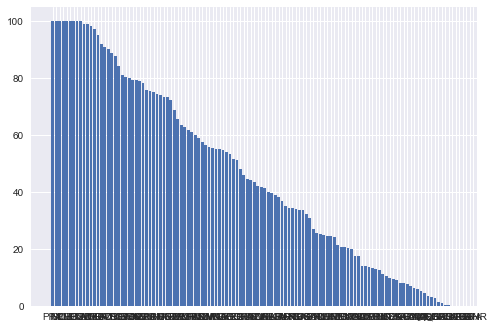

In [91]:
plt.bar(totalratiocountry['country'],totalratiocountry['green_ratio'])

In [92]:
# Paraguay, Iceland, Nepal, Albania, Switzerland, Tajikistan, Mozambique, Ethiopia
print(totalratiocountry[totalratiocountry['green_ratio']==100])

    country  green_ratio
127     PRY        100.0
74      ISL        100.0
116     NPL        100.0
2       ALB        100.0
26      CHE        100.0
146     TJK        100.0
105     MOZ        100.0
50      ETH        100.0


In [93]:
# checking the original dataset
masknpl = df_all['country'] == 'NPL'
npl = df_all[masknpl]
npl

,country,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,owner,source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,estimated_generation_gwh
14528,NPL,GEODB0040476,45.00,27.9388,85.9450,Hydro,NaN,NaN,NaN,NaN,NaN,GEODB,2017.0,NaN,NaN,NaN,NaN,NaN,305.591899
14529,NPL,GEODB0040484,14.10,27.9212,85.1462,Hydro,NaN,NaN,NaN,NaN,NaN,GEODB,2017.0,NaN,NaN,NaN,NaN,NaN,95.752128
14530,NPL,GEODB0044203,15.00,27.4268,83.7918,Hydro,NaN,NaN,NaN,NaN,NaN,GEODB,2017.0,NaN,NaN,NaN,NaN,NaN,101.863966
14531,NPL,GEODB0040475,144.00,27.9760,83.5680,Hydro,NaN,NaN,NaN,NaN,NaN,GEODB,2017.0,NaN,NaN,NaN,NaN,NaN,977.894077
14532,NPL,GEODB0040485,60.00,27.5500,86.1690,Hydro,NaN,NaN,NaN,NaN,NaN,GEODB,2017.0,NaN,NaN,NaN,NaN,NaN,407.455865
14533,NPL,GEODB0040480,60.00,27.5900,85.1550,Hydro,NaN,NaN,NaN,NaN,NaN,GEODB,2017.0,NaN,NaN,NaN,NaN,NaN,407.455865
14534,NPL,GEODB0040482,32.00,27.5090,85.0519,Hydro,NaN,NaN,NaN,NaN,NaN,GEODB,2017.0,NaN,NaN,NaN,NaN,NaN,217.309795
14535,NPL,GEODB0040477,69.00,27.9262,84.4965,Hydro,NaN,NaN,NaN,NaN,NaN,GEODB,2017.0,NaN,NaN,NaN,NaN,NaN,468.574245
14536,NPL,GEODB0040478,70.00,28.1890,84.4195,Hydro,NaN,NaN,NaN,NaN,NaN,GEODB,2017.0,NaN,NaN,NaN,NaN,NaN,475.365176
14537,NPL,GEODB0043974,14.80,28.2720,83.7411,Hydro,NaN,NaN,NaN,NaN,NaN,GEODB,2017.0,NaN,NaN,NaN,NaN,NaN,100.505780


In [94]:
#54 countries with green ratio of >= 50
totalratiocountry[totalratiocountry['green_ratio']>=50].nunique()

country        54
green_ratio    47
dtype: int64

# Ratio green energy capacity over all capacity (per country)

In [95]:
df_all['green'] = df_all["primary_fuel"].map({'Gas':0,'Coal':0,'Oil':0,'Petcoke':0,'Cogeneration':0,'Other':0,'Storage':0,'Waste':1, 'Wind':1,'Hydro':1,'Solar':1,'Nuclear':1,'Biomass':1,'Geothermal':1,'Wave and Tidal':1})
df_all

,country,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,owner,source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,estimated_generation_gwh,green
0,AFG,GEODB0040538,33.00,32.3220,65.1190,Hydro,NaN,NaN,NaN,NaN,NaN,GEODB,2017.0,NaN,NaN,NaN,NaN,NaN,NaN,1
1,AFG,GEODB0040541,66.00,34.5560,69.4787,Hydro,NaN,NaN,NaN,NaN,NaN,GEODB,2017.0,NaN,NaN,NaN,NaN,NaN,NaN,1
2,AFG,GEODB0040534,100.00,34.6410,69.7170,Hydro,NaN,NaN,NaN,NaN,NaN,GEODB,2017.0,NaN,NaN,NaN,NaN,NaN,NaN,1
3,AFG,GEODB0040536,11.55,34.4847,70.3633,Hydro,NaN,NaN,NaN,NaN,NaN,GEODB,2017.0,NaN,NaN,NaN,NaN,NaN,NaN,1
4,AFG,GEODB0040540,42.00,34.5638,69.1134,Gas,NaN,NaN,NaN,NaN,NaN,GEODB,2017.0,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29905,ZMB,WRI1022386,50.00,-12.9667,28.6333,Oil,NaN,NaN,NaN,NaN,ZESCO,Energy Regulation Board of Zambia,NaN,NaN,NaN,NaN,NaN,NaN,120.872642,0
29906,ZMB,WRI1022384,20.00,-12.8167,28.2000,Oil,NaN,NaN,NaN,NaN,ZESCO,Energy Regulation Board of Zambia,NaN,NaN,NaN,NaN,NaN,NaN,48.349057,0
29907,ZMB,WRI1022380,108.00,-17.9167,25.8500,Hydro,NaN,NaN,NaN,NaN,ZESCO,Energy Regulation Board of Zambia,NaN,NaN,NaN,NaN,NaN,NaN,702.100000,1
29908,ZWE,GEODB0040404,920.00,-18.3835,26.4700,Coal,NaN,NaN,NaN,NaN,NaN,GEODB,2017.0,NaN,NaN,NaN,NaN,NaN,4397.000000,0


In [96]:
maskgreen = df_all['green'] == 1
df_all_green = df_all[maskgreen]
df_all_green

,country,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,owner,source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,estimated_generation_gwh,green
0,AFG,GEODB0040538,33.000,32.3220,65.1190,Hydro,NaN,NaN,NaN,NaN,NaN,GEODB,2017.0,NaN,NaN,NaN,NaN,NaN,NaN,1
1,AFG,GEODB0040541,66.000,34.5560,69.4787,Hydro,NaN,NaN,NaN,NaN,NaN,GEODB,2017.0,NaN,NaN,NaN,NaN,NaN,NaN,1
2,AFG,GEODB0040534,100.000,34.6410,69.7170,Hydro,NaN,NaN,NaN,NaN,NaN,GEODB,2017.0,NaN,NaN,NaN,NaN,NaN,NaN,1
3,AFG,GEODB0040536,11.550,34.4847,70.3633,Hydro,NaN,NaN,NaN,NaN,NaN,GEODB,2017.0,NaN,NaN,NaN,NaN,NaN,NaN,1
5,AFG,GEODB0040537,6.000,35.9416,68.7100,Hydro,NaN,NaN,NaN,NaN,NaN,GEODB,2017.0,NaN,NaN,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29897,ZMB,WRI1000021,930.000,-16.5222,28.7619,Hydro,NaN,NaN,NaN,NaN,ZESCO,Energy Regulation Board of Zambia,NaN,NaN,NaN,NaN,NaN,NaN,6045.861111,1
29901,ZMB,WRI1000023,12.000,-12.9884,30.8649,Hydro,NaN,NaN,NaN,NaN,ZESCO,Energy Regulation Board of Zambia,NaN,NaN,NaN,NaN,NaN,NaN,78.011111,1
29904,ZMB,WRI1022375,12.237,-15.8333,27.7667,Biomass,NaN,NaN,NaN,NaN,Zambia Sugar,Energy Regulation Board of Zambia,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1
29907,ZMB,WRI1022380,108.000,-17.9167,25.8500,Hydro,NaN,NaN,NaN,NaN,ZESCO,Energy Regulation Board of Zambia,NaN,NaN,NaN,NaN,NaN,NaN,702.100000,1


In [97]:
df_all_g = df_all.groupby('country')
df_all_green_g = df_all_green.groupby('country')

In [98]:
df_all_g['capacity_mw'].sum()

country
AFG      280.550
AGO     1071.180
ALB     1529.000
ARE    29607.000
ARG    32400.579
         ...    
VNM    39734.090
YEM     1045.000
ZAF    50172.300
ZMB     2641.837
ZWE     1670.000
Name: capacity_mw, Length: 164, dtype: float64

In [99]:
df_all_green_g['capacity_mw'].sum()

country
AFG      238.550
AGO      770.600
ALB     1431.000
ARE      120.000
ARG    11977.590
         ...    
VEN    17666.000
VNM    16960.090
ZAF     7969.300
ZMB     2172.237
ZWE      750.000
Name: capacity_mw, Length: 141, dtype: float64

In [100]:
trcapacity = df_all_green_g['capacity_mw'].sum()*100/df_all_g['capacity_mw'].sum()
trcapacity

country
AFG    85.029407
AGO    71.939357
ALB    93.590582
ARE     0.405310
ARG    36.967210
         ...    
VNM    42.683977
YEM          NaN
ZAF    15.883864
ZMB    82.224490
ZWE    44.910180
Name: capacity_mw, Length: 164, dtype: float64

In [101]:
# https://stackoverflow.com/questions/40224319/pandas-series-to-dataframe-using-series-indexes-as-columns
trcapacity=trcapacity.to_frame()
trcapacity.reset_index(inplace=True)

In [102]:
trcapacity = trcapacity.sort_values('capacity_mw', ascending=False)
trcapacity = trcapacity.rename(columns={'capacity_mw':'green_ratio_capacity'})
trcapacity

,country,green_ratio_capacity
22,BTN,100.0
101,MLI,100.0
26,CHE,100.0
105,MOZ,100.0
50,ETH,100.0
...,...,...
118,OMN,NaN
128,QAT,NaN
147,TKM,NaN
148,TTO,NaN


<BarContainer object of 164 artists>

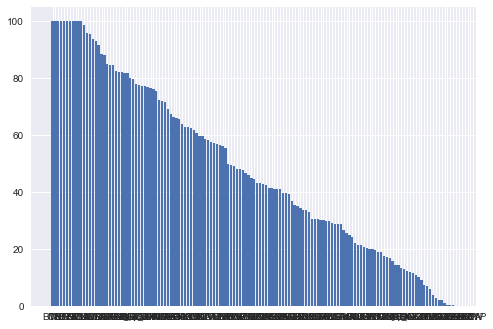

In [103]:
plt.bar(trcapacity['country'],trcapacity['green_ratio_capacity'])

In [104]:
# Bhutan, Mali, Zwitzerland, Mozambique, Ethiopia,Paraguay, Eswatini, Iceland, Nepal, Burundi, Lesotho
print(trcapacity[trcapacity['green_ratio_capacity']==100])

    country  green_ratio_capacity
22      BTN                 100.0
101     MLI                 100.0
26      CHE                 100.0
105     MOZ                 100.0
50      ETH                 100.0
127     PRY                 100.0
142     SWZ                 100.0
74      ISL                 100.0
116     NPL                 100.0
10      BDI                 100.0
92      LSO                 100.0


In [105]:
# 61 countries with green capacity ratio of >= 50
trcapacity[trcapacity['green_ratio_capacity']>=50].nunique()

country                 61
green_ratio_capacity    51
dtype: int64

## Regression on complete time series dataset

In [106]:
df_time_series_complete

,country,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,owner,source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,estimated_generation_gwh
gppd_idnr,,,,,,,,,,,,,,,,,,
AUS0000065,AUS,21.6,-35.0641,117.7977,Wind,NaN,NaN,NaN,NaN,Verve Energy,Australian Renewable Energy Mapping Infrastruc...,NaN,89.595278,102.642778,96.555556,95.872778,85.900278,94.113333
AUS0000264,AUS,55.6,-34.2082,150.7722,Gas,NaN,NaN,NaN,NaN,Energy Developments CSM (NSW) Pty Ltd,Australian Renewable Energy Mapping Infrastruc...,NaN,204.804444,238.294444,163.583611,158.933056,64.534722,166.030056
AUS0000049,AUS,1.1,-33.0250,151.5497,Waste,NaN,NaN,NaN,NaN,LMS Energy Generation Pty Ltd,Australian Renewable Energy Mapping Infrastruc...,NaN,7.655278,8.338611,9.172500,8.830000,8.085556,8.416389
AUS0000081,AUS,94.0,-37.8429,147.5639,Gas,NaN,NaN,NaN,NaN,Alinta DEBO,Australian Renewable Energy Mapping Infrastruc...,NaN,132.456667,154.885556,149.821111,197.540556,168.524444,160.645667
AUS0000113,AUS,3.0,-37.5596,143.8469,Gas,NaN,NaN,NaN,NaN,Ballarat Base Hospital,Australian Renewable Energy Mapping Infrastruc...,NaN,4.194444,4.213056,5.079444,6.831389,6.663333,5.396333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
USA0055392,USA,596.7,42.4776,-87.8950,Gas,Oil,NaN,NaN,2002.333333,Zion Energy LLC,U.S. Energy Information Administration,2017.0,0.000000,63.656000,132.434005,435.493999,462.063000,218.729401
USA0056871,USA,7.0,42.4803,-87.8861,Waste,NaN,NaN,NaN,2003.000000,Energy Developments Inc,U.S. Energy Information Administration,2017.0,43.592000,49.134000,46.699000,42.480000,38.669000,44.114800
USA0001368,USA,18.0,38.2803,-85.7023,Gas,NaN,NaN,NaN,1969.000000,Louisville Gas & Electric Co,U.S. Energy Information Administration,2017.0,0.203000,0.078000,1.058000,0.062000,0.015000,0.283200


In [107]:
import statsmodels.formula.api as sm
# We have seen that there is a correlation between energy generations values in 2013-2017 years. 
# So let's check if other variables can adequately explain the generation in 2017:
model1 = sm.ols(formula="generation_gwh_2017 ~ country + capacity_mw + latitude + longitude + primary_fuel + commissioning_year", data=df_time_series_complete).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     generation_gwh_2017   R-squared:                       0.825
Model:                             OLS   Adj. R-squared:                  0.824
Method:                  Least Squares   F-statistic:                     1726.
Date:                 Sat, 20 Mar 2021   Prob (F-statistic):               0.00
Time:                         13:50:28   Log-Likelihood:                -54933.
No. Observations:                 6616   AIC:                         1.099e+05
Df Residuals:                     6597   BIC:                         1.100e+05
Df Model:                           18                                         
Covariance Type:             nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                    -2964.7713    935.473     -3.169      0.002   -4798.602   -1130.941
country[T.IND]               -1305.8011    486.622     -2.683      0.007   -2259.738    -351.865
country[T.USA]               -1658.9703    458.308     -3.620      0.000   -2557.403    -760.537
primary_fuel[T.Coal]           515.4342    102.692      5.019      0.000     314.124     716.744
primary_fuel[T.Cogeneration]   -31.0742    203.684     -0.153      0.879    -430.362     368.213
primary_fuel[T.Gas]           -515.5700     89.342     -5.771      0.000    -690.709    -340.431
primary_fuel[T.Geothermal]     -64.0574    153.277     -0.418      0.676    -364.529     236.414
primary_fuel[T.Hydro]          -88.7760     93.051     -0.954      0.340    -271.185      93.633
primary_fuel[T.Nuclear]       6011.2253    157.018     38.284      0.000    5703.419    6319.031
primary_fuel[T.Oil]           -201.3087     93.053     -2.163      0.031    -383.723     -18.895
primary_fuel[T.Other]          -76.5299    266.778     -0.287      0.774    -599.502     446.442
primary_fuel[T.Petcoke]       -117.9778    307.171     -0.384      0.701    -720.133     484.177
primary_fuel[T.Solar]         -102.1755     95.015     -1.075      0.282    -288.435      84.084
primary_fuel[T.Storage]       -109.9137    445.882     -0.247      0.805    -983.988     764.160
primary_fuel[T.Waste]          -41.7905     96.669     -0.432      0.666    -231.293     147.712
primary_fuel[T.Wind]          -185.9055     93.096     -1.997      0.046    -368.404      -3.407
capacity_mw                      3.9149      0.034    116.703      0.000       3.849       3.981
latitude                         5.5183      2.160      2.555      0.011       1.285       9.752
longitude                       -1.5733      0.675     -2.332      0.020      -2.896      -0.251
commissioning_year               2.1618      0.699      3.093      0.002       0.791       3.532
==============================================================================
Omnibus:                     2516.287   Durbin-Watson:                   1.939
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           444370.806
Skew:                           0.696   Prob(JB):                         0.00
Kurtosis:                      43.125   Cond. No.                     3.53e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.13e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [108]:
# Primary fuel type variable can explain a lot of generation_gwh_2017 data values.
# However, some p-values are high.
model2 = sm.ols(formula="generation_gwh_2017 ~ primary_fuel", data=df_time_series_complete).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     generation_gwh_2017   R-squared:                       0.457
Model:                             OLS   Adj. R-squared:                  0.456
Method:                  Least Squares   F-statistic:                     440.6
Date:                 Sat, 20 Mar 2021   Prob (F-statistic):               0.00
Time:                         13:50:28   Log-Likelihood:                -60481.
No. Observations:                 6817   AIC:                         1.210e+05
Df Residuals:                     6803   BIC:                         1.211e+05
Df Model:                           13                                         
Covariance Type:             nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                      199.3238    150.888      1.321      0.187     -96.463     495.111
primary_fuel[T.Coal]          4089.7663    169.683     24.102      0.000    3757.134    4422.398
primary_fuel[T.Cogeneration]   -65.5498    359.562     -0.182      0.855    -770.403     639.304
primary_fuel[T.Gas]            552.3674    156.620      3.527      0.000     245.343     859.392
primary_fuel[T.Geothermal]      59.2136    269.212      0.220      0.826    -468.527     586.954
primary_fuel[T.Hydro]           61.0791    156.973      0.389      0.697    -246.637     368.795
primary_fuel[T.Nuclear]       1.229e+04    259.388     47.391      0.000    1.18e+04    1.28e+04
primary_fuel[T.Oil]           -175.0156    163.007     -1.074      0.283    -494.561     144.529
primary_fuel[T.Other]          -84.7796    470.744     -0.180      0.857   -1007.585     838.026
primary_fuel[T.Petcoke]        557.7680    542.128      1.029      0.304    -504.973    1620.509
primary_fuel[T.Solar]         -174.0190    166.207     -1.047      0.295    -499.836     151.798
primary_fuel[T.Storage]       -197.6020    786.934     -0.251      0.802   -1740.239    1345.036
primary_fuel[T.Waste]         -112.3292    169.228     -0.664      0.507    -444.069     219.411
primary_fuel[T.Wind]            11.8537    162.563      0.073      0.942    -306.820     330.527
==============================================================================
Omnibus:                     6964.467   Durbin-Watson:                   1.900
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           818507.088
Skew:                           4.809   Prob(JB):                         0.00
Kurtosis:                      55.812   Cond. No.                         41.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [109]:
# Country, on the other hand, does not seem to explain much. The p-values are small, however.
model3 = sm.ols(formula="generation_gwh_2017 ~ country", data=df_time_series_complete).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     generation_gwh_2017   R-squared:                       0.038
Model:                             OLS   Adj. R-squared:                  0.038
Method:                  Least Squares   F-statistic:                     135.8
Date:                 Sat, 20 Mar 2021   Prob (F-statistic):           1.49e-58
Time:                         13:50:28   Log-Likelihood:                -62430.
No. Observations:                 6817   AIC:                         1.249e+05
Df Residuals:                     6814   BIC:                         1.249e+05
Df Model:                            2                                         
Covariance Type:             nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        918.3100    161.994      5.669      0.000     600.751    1235.869
country[T.IND]  1703.6902    201.051      8.474      0.000    1309.568    2097.812
country[T.USA]  -310.8734    164.581     -1.889      0.059    -633.503      11.757
==============================================================================
Omnibus:                     7564.238   Durbin-Watson:                   1.882
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           590571.707
Skew:                           5.785   Prob(JB):                         0.00
Kurtosis:                      47.106   Cond. No.                         14.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [110]:
# Of course, capacity also explains a lot of data, 
# so wihout it as the predictor variable, the R-squared is considerably lower:
model4 = sm.ols(formula="generation_gwh_2017 ~ country + latitude + longitude + primary_fuel + commissioning_year", data=df_time_series_complete).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     generation_gwh_2017   R-squared:                       0.463
Model:                             OLS   Adj. R-squared:                  0.462
Method:                  Least Squares   F-statistic:                     334.8
Date:                 Sat, 20 Mar 2021   Prob (F-statistic):               0.00
Time:                         13:50:28   Log-Likelihood:                -58637.
No. Observations:                 6616   AIC:                         1.173e+05
Df Residuals:                     6598   BIC:                         1.174e+05
Df Model:                           17                                         
Covariance Type:             nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                    -8007.7988   1635.743     -4.896      0.000   -1.12e+04   -4801.214
country[T.IND]               -4064.9209    850.797     -4.778      0.000   -5732.759   -2397.083
country[T.USA]               -3942.8779    801.510     -4.919      0.000   -5514.097   -2371.659
primary_fuel[T.Coal]          3875.0563    172.549     22.458      0.000    3536.804    4213.308
primary_fuel[T.Cogeneration]  -104.6249    356.536     -0.293      0.769    -803.551     594.301
primary_fuel[T.Gas]            567.7266    155.541      3.650      0.000     262.815     872.638
primary_fuel[T.Geothermal]      59.0353    268.295      0.220      0.826    -466.910     584.981
primary_fuel[T.Hydro]          313.5734    162.768      1.927      0.054      -5.504     632.651
primary_fuel[T.Nuclear]       1.233e+04    257.985     47.800      0.000    1.18e+04    1.28e+04
primary_fuel[T.Oil]            -33.3359    162.864     -0.205      0.838    -352.603     285.931
primary_fuel[T.Other]          -90.9055    466.980     -0.195      0.846   -1006.337     824.526
primary_fuel[T.Petcoke]        617.2829    537.572      1.148      0.251    -436.532    1671.098
primary_fuel[T.Solar]         -295.2723    166.292     -1.776      0.076    -621.259      30.714
primary_fuel[T.Storage]       -319.8659    780.485     -0.410      0.682   -1849.868    1210.136
primary_fuel[T.Waste]         -106.7858    169.211     -0.631      0.528    -438.494     224.922
primary_fuel[T.Wind]            -2.7777    162.936     -0.017      0.986    -322.186     316.630
latitude                       -23.2951      3.755     -6.203      0.000     -30.657     -15.933
longitude                        1.3148      1.180      1.114      0.265      -0.998       3.628
commissioning_year               6.5928      1.222      5.396      0.000       4.198       8.988
==============================================================================
Omnibus:                     6826.297   Durbin-Watson:                   1.905
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           830092.056
Skew:                           4.880   Prob(JB):                         0.00
Kurtosis:                      57.000   Cond. No.                     4.08e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.58e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [111]:
# But without primary_fuel as the predictor variable, the model still has high R-squared value.
model5 = sm.ols(formula="generation_gwh_2017 ~ country + capacity_mw + latitude + longitude + commissioning_year", data=df_time_series_complete).fit()
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     generation_gwh_2017   R-squared:                       0.754
Model:                             OLS   Adj. R-squared:                  0.754
Method:                  Least Squares   F-statistic:                     4052.
Date:                 Sat, 20 Mar 2021   Prob (F-statistic):               0.00
Time:                         13:50:28   Log-Likelihood:                -56056.
No. Observations:                 6616   AIC:                         1.121e+05
Df Residuals:                     6610   BIC:                         1.122e+05
Df Model:                            5                                         
Covariance Type:             nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           -623.0271    774.559     -0.804      0.421   -2141.413     895.359
country[T.IND]      -122.6854    398.955     -0.308      0.758    -904.765     659.394
country[T.USA]      -500.3417    390.654     -1.281      0.200   -1266.150     265.467
capacity_mw            4.4510      0.032    137.609      0.000       4.388       4.514
latitude              12.0870      2.457      4.919      0.000       7.270      16.904
longitude             -0.4987      0.783     -0.637      0.524      -2.034       1.037
commissioning_year     0.2114      0.579      0.365      0.715      -0.923       1.346
==============================================================================
Omnibus:                     2730.134   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           310512.225
Skew:                           0.986   Prob(JB):                         0.00
Kurtosis:                      36.504   Cond. No.                     1.52e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.14e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [112]:
# If we want to have a model with the smallest number of predictor variables and high R-squared:
model6 = sm.ols(formula="generation_gwh_2017 ~ capacity_mw + primary_fuel", data=df_time_series_complete).fit()
model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     generation_gwh_2017   R-squared:                       0.825
Model:                             OLS   Adj. R-squared:                  0.825
Method:                  Least Squares   F-statistic:                     2294.
Date:                 Sat, 20 Mar 2021   Prob (F-statistic):               0.00
Time:                         13:50:28   Log-Likelihood:                -56618.
No. Observations:                 6817   AIC:                         1.133e+05
Df Residuals:                     6802   BIC:                         1.134e+05
Df Model:                           14                                         
Covariance Type:             nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       39.0896     85.631      0.456      0.648    -128.775     206.954
primary_fuel[T.Coal]           571.7521    100.673      5.679      0.000     374.402     769.102
primary_fuel[T.Cogeneration]   -38.6949    204.033     -0.190      0.850    -438.663     361.273
primary_fuel[T.Gas]           -511.4466     89.317     -5.726      0.000    -686.536    -336.357
primary_fuel[T.Geothermal]     -20.8792    152.765     -0.137      0.891    -320.347     278.589
primary_fuel[T.Hydro]         -137.2667     89.089     -1.541      0.123    -311.910      37.376
primary_fuel[T.Nuclear]       5950.6799    156.436     38.039      0.000    5644.017    6257.342
primary_fuel[T.Oil]           -184.1407     92.498     -1.991      0.047    -365.466      -2.816
primary_fuel[T.Other]         -101.6395    267.123     -0.380      0.704    -625.283     422.005
primary_fuel[T.Petcoke]       -149.6606    307.686     -0.486      0.627    -752.822     453.500
primary_fuel[T.Solar]          -61.7632     94.318     -0.655      0.513    -246.656     123.130
primary_fuel[T.Storage]        -55.7638    446.546     -0.125      0.901    -931.133     819.605
primary_fuel[T.Waste]          -25.2320     96.031     -0.263      0.793    -213.483     163.019
primary_fuel[T.Wind]          -129.9957     92.253     -1.409      0.159    -310.841      50.850
capacity_mw                      3.9308      0.033    119.689      0.000       3.866       3.995
==============================================================================
Omnibus:                     2478.780   Durbin-Watson:                   1.932
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           424041.203
Skew:                           0.613   Prob(JB):                         0.00
Kurtosis:                      41.618   Cond. No.                     1.91e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.91e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [113]:
# What about we try the first model on the entire dataset?
model11 = sm.ols(formula="generation_gwh_2017 ~ country + capacity_mw + latitude + longitude + primary_fuel + commissioning_year", data=df_all).fit()
model11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     generation_gwh_2017   R-squared:                       0.821
Model:                             OLS   Adj. R-squared:                  0.821
Method:                  Least Squares   F-statistic:                     2057.
Date:                 Sat, 20 Mar 2021   Prob (F-statistic):               0.00
Time:                         13:50:29   Log-Likelihood:                -73405.
No. Observations:                 8968   AIC:                         1.469e+05
Df Residuals:                     8947   BIC:                         1.470e+05
Df Model:                           20                                         
Covariance Type:             nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                      -3638.3460    970.020     -3.751      0.000   -5539.808   -1736.884
country[T.AGO]                  1.946e-09   5.08e-10      3.828      0.000    9.49e-10    2.94e-09
country[T.ALB]                 -3.277e-09   1.19e-09     -2.754      0.006   -5.61e-09   -9.45e-10
country[T.ARE]                 -3.048e-10   7.39e-11     -4.127      0.000    -4.5e-10    -1.6e-10
country[T.ARG]                  -5.38e-10   1.33e-10     -4.035      0.000   -7.99e-10   -2.77e-10
country[T.ARM]                   7.52e-11   1.87e-11      4.020      0.000    3.85e-11    1.12e-10
country[T.ATA]                  6.936e-12    2.6e-12      2.668      0.008    1.84e-12     1.2e-11
country[T.AUS]                 -1.112e-11   3.33e-12     -3.341      0.001   -1.76e-11    -4.6e-12
country[T.AUT]                 -3.708e-12   1.84e-12     -2.017      0.044   -7.31e-12   -1.05e-13
country[T.AZE]                  9.105e-13   1.15e-12      0.795      0.427   -1.34e-12    3.16e-12
country[T.BDI]                 -5.499e-12   1.07e-12     -5.155      0.000   -7.59e-12   -3.41e-12
country[T.BEL]                  5.254e-12   1.43e-12      3.680      0.000    2.46e-12    8.05e-12
country[T.BEN]                  2.847e-12   9.99e-13      2.850      0.004    8.89e-13    4.81e-12
country[T.BFA]                 -6.391e-13   2.56e-13     -2.497      0.013   -1.14e-12   -1.37e-13
country[T.BGD]                 -2.551e-13   4.11e-13     -0.621      0.534   -1.06e-12     5.5e-13
country[T.BGR]                  2.941e-13   1.52e-12      0.193      0.847   -2.69e-12    3.28e-12
country[T.BHR]                 -2.853e-14    4.7e-13     -0.061      0.952    -9.5e-13    8.92e-13
country[T.BIH]                  3.381e-14   3.66e-14      0.923      0.356    -3.8e-14    1.06e-13
country[T.BLR]                 -1.987e-13    6.7e-14     -2.965      0.003    -3.3e-13   -6.74e-14
country[T.BOL]                 -5.921e-14   6.09e-14     -0.972      0.331   -1.79e-13    6.01e-14
country[T.BRA]                  1.793e-14   4.54e-14      0.395      0.693   -7.12e-14    1.07e-13
country[T.BRN]                          0          0        nan        nan           0           0
country[T.BTN]                          0          0        nan        nan           0           0
country[T.BWA]                          0          0        nan        nan           0           0
country[T.CAF]                          0          0        nan        nan           0           0
country[T.CAN]                          0          0        nan        nan           0           0
country[T.CHE]                          0          0        nan        nan           0           0
country[T.CHL]                          0          0        nan        nan           0           0
cou

In [114]:
# Of course, there are a lot of countries, plus there are latitude/longitude values already.
# Let's try without countries variable.
model12 = sm.ols(formula="generation_gwh_2017 ~ capacity_mw + latitude + longitude + primary_fuel + commissioning_year", data=df_all).fit()
model12.summary()
# The R-squared remains the same.

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     generation_gwh_2017   R-squared:                       0.821
Model:                             OLS   Adj. R-squared:                  0.821
Method:                  Least Squares   F-statistic:                     2420.
Date:                 Sat, 20 Mar 2021   Prob (F-statistic):               0.00
Time:                         13:50:29   Log-Likelihood:                -73406.
No. Observations:                 8968   AIC:                         1.468e+05
Df Residuals:                     8950   BIC:                         1.470e+05
Df Model:                           17                                         
Covariance Type:             nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                      -4904.0155   1149.596     -4.266      0.000   -7157.487   -2650.543
primary_fuel[T.Coal]             501.8722     84.900      5.911      0.000     335.448     668.296
primary_fuel[T.Cogeneration]     -20.6985    166.574     -0.124      0.901    -347.222     305.825
primary_fuel[T.Gas]             -467.5168     73.059     -6.399      0.000    -610.729    -324.304
primary_fuel[T.Geothermal]       -29.9267    129.189     -0.232      0.817    -283.166     223.313
primary_fuel[T.Hydro]            -46.4138     75.976     -0.611      0.541    -195.344     102.517
primary_fuel[T.Nuclear]         5867.5398    134.469     43.635      0.000    5603.950    6131.130
primary_fuel[T.Oil]             -176.5427     76.351     -2.312      0.021    -326.208     -26.877
primary_fuel[T.Other]            -56.3039    228.335     -0.247      0.805    -503.893     391.285
primary_fuel[T.Petcoke]          -97.6576    260.506     -0.375      0.708    -608.308     412.993
primary_fuel[T.Solar]            -99.4507     72.684     -1.368      0.171    -241.927      43.026
primary_fuel[T.Storage]         -118.5724    134.105     -0.884      0.377    -381.448     144.304
primary_fuel[T.Waste]            -35.7840     78.869     -0.454      0.650    -190.386     118.818
primary_fuel[T.Wave and Tidal]   4.25e-13    8.4e-14      5.058      0.000     2.6e-13     5.9e-13
primary_fuel[T.Wind]            -166.4188     75.103     -2.216      0.027    -313.637     -19.200
capacity_mw                        3.9095      0.029    134.362      0.000       3.852       3.967
latitude                           4.9460      1.629      3.036      0.002       1.752       8.140
longitude                         -0.5199      0.277     -1.877      0.061      -1.063       0.023
commissioning_year                 2.3559      0.571      4.126      0.000       1.237       3.475
==============================================================================
Omnibus:                     3725.036   Durbin-Watson:                   1.904
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           990515.149
Skew:                           0.776   Prob(JB):                         0.00
Kurtosis:                      54.463   Cond. No.                     1.78e+22
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.14e-34. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [115]:
# Let's try without latitude/longitude:
model13 = sm.ols(formula="generation_gwh_2017 ~ capacity_mw + primary_fuel + commissioning_year", data=df_all).fit()
model13.summary()
# The R-squared remains the same.
# It is interesting to see which primary_fuels have + and - signs. 
# Also interesting that the capacity has a coefficient of almost 3.89.

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     generation_gwh_2017   R-squared:                       0.821
Model:                             OLS   Adj. R-squared:                  0.821
Method:                  Least Squares   F-statistic:                     2735.
Date:                 Sat, 20 Mar 2021   Prob (F-statistic):               0.00
Time:                         13:50:29   Log-Likelihood:                -73417.
No. Observations:                 8968   AIC:                         1.469e+05
Df Residuals:                     8952   BIC:                         1.470e+05
Df Model:                           15                                         
Covariance Type:             nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                      -3659.4989   1116.039     -3.279      0.001   -5847.192   -1471.806
primary_fuel[T.Coal]             459.6654     83.644      5.495      0.000     295.703     623.628
primary_fuel[T.Cogeneration]     -32.2539    166.708     -0.193      0.847    -359.039     294.531
primary_fuel[T.Gas]             -468.5986     73.131     -6.408      0.000    -611.952    -325.245
primary_fuel[T.Geothermal]       -19.0437    129.157     -0.147      0.883    -272.220     234.133
primary_fuel[T.Hydro]            -64.7654     75.481     -0.858      0.391    -212.726      83.196
primary_fuel[T.Nuclear]         5868.3188    134.402     43.662      0.000    5604.859    6131.778
primary_fuel[T.Oil]             -158.2333     76.088     -2.080      0.038    -307.383      -9.084
primary_fuel[T.Other]            -77.0907    228.454     -0.337      0.736    -524.913     370.732
primary_fuel[T.Petcoke]         -105.1361    260.805     -0.403      0.687    -616.374     406.102
primary_fuel[T.Solar]            -92.4499     72.754     -1.271      0.204    -235.064      50.164
primary_fuel[T.Storage]          -98.5604    134.194     -0.734      0.463    -361.612     164.491
primary_fuel[T.Waste]            -29.7772     78.904     -0.377      0.706    -184.447     124.893
primary_fuel[T.Wave and Tidal]  1.651e-14   1.32e-14      1.248      0.212   -9.42e-15    4.24e-14
primary_fuel[T.Wind]            -145.7608     75.060     -1.942      0.052    -292.896       1.374
capacity_mw                        3.8900      0.029    134.913      0.000       3.834       3.947
commissioning_year                 1.8509      0.558      3.317      0.001       0.757       2.945
==============================================================================
Omnibus:                     3691.737   Durbin-Watson:                   1.903
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           973874.750
Skew:                           0.758   Prob(JB):                         0.00
Kurtosis:                      54.029   Cond. No.                     2.06e+22
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.45e-35. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [116]:
# Multicolinearity:

model14 = sm.ols(formula="generation_gwh_2017 ~ capacity_mw + primary_fuel + commissioning_year + capacity_mw*primary_fuel+capacity_mw*commissioning_year+primary_fuel*commissioning_year", data=df_all).fit()
model14.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     generation_gwh_2017   R-squared:                       0.877
Model:                             OLS   Adj. R-squared:                  0.877
Method:                  Least Squares   F-statistic:                     1520.
Date:                 Sat, 20 Mar 2021   Prob (F-statistic):               0.00
Time:                         13:50:30   Log-Likelihood:                -71719.
No. Observations:                 8968   AIC:                         1.435e+05
Df Residuals:                     8925   BIC:                         1.438e+05
Df Model:                           42                                         
Covariance Type:             nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
Intercept                                          4972.8518   8177.159      0.608      0.543   -1.11e+04     2.1e+04
primary_fuel[T.Coal]                               3.378e+04   9308.722      3.629      0.000    1.55e+04     5.2e+04
primary_fuel[T.Cogeneration]                      -4353.9778    1.9e+04     -0.229      0.819   -4.16e+04    3.29e+04
primary_fuel[T.Gas]                                -1.49e+04   8512.109     -1.750      0.080   -3.16e+04    1787.098
primary_fuel[T.Geothermal]                        -3714.0971   1.88e+04     -0.197      0.844   -4.07e+04    3.32e+04
primary_fuel[T.Hydro]                              -581.1888   8261.185     -0.070      0.944   -1.68e+04    1.56e+04
primary_fuel[T.Nuclear]                            3.037e+05   2.18e+04     13.927      0.000    2.61e+05    3.46e+05
primary_fuel[T.Oil]                               -5900.0533   8806.785     -0.670      0.503   -2.32e+04    1.14e+04
primary_fuel[T.Other]                             -4492.5430   2.03e+04     -0.222      0.824   -4.42e+04    3.52e+04
primary_fuel[T.Petcoke]                            2.882e+04   4.58e+04      0.629      0.529    -6.1e+04    1.19e+05
primary_fuel[T.Solar]                             -2474.8871   1.39e+04     -0.178      0.859   -2.98e+04    2.48e+04
primary_fuel[T.Storage]                           -3667.7158   7.29e+04     -0.050      0.960   -1.47e+05    1.39e+05
primary_fuel[T.Waste]                             -3091.1277   9875.693     -0.313      0.754   -2.24e+04    1.63e+04
primary_fuel[T.Wave and Tidal]                     4.577e-06   1.44e-05      0.317      0.751   -2.37e-05    3.29e-05
primary_fuel[T.Wind]                              -6112.0385    1.1e+04     -0.557      0.577   -2.76e+04    1.54e+04
capacity_mw                                         -62.3861      3.646    -17.110      0.000     -69.533     -55.239
capacity_mw:primary_fuel[T.Coal]                      0.5218      1.793      0.291      0.771      -2.992       4.036
capacity_mw:primary_fuel[T.Cogeneration]             -0.7132      4.560     -0.156      0.876      -9.652       8.225
capacity_mw:primary_fuel[T.Gas]                      -1.7047      1.793     -0.951      0.342      -5.219       1.809
capacity_mw:primary_fuel[T.Geothermal]               -0.1325      1.908     -0.069      0.945      -3.873       3.608
capacity_mw:primary_fuel[T.Hydro]                    -1.1318      1.793     -0.631      0.528      -4.647       2.384
capacity_mw:primary_fuel[T.Nuclear]                   3.8027      1.796      2.118      0.034       0.283       7.322
capacity_mw:primary_fuel[T.Oil]                      -2.9635      1.798     -1.648      0.099      -6.489       0.562
capa

In [117]:
model15 = sm.ols(formula="generation_gwh_2017 ~ capacity_mw + primary_fuel + commissioning_year + capacity_mw*primary_fuel+capacity_mw*commissioning_year", data=df_all).fit()
model15.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     generation_gwh_2017   R-squared:                       0.873
Model:                             OLS   Adj. R-squared:                  0.872
Method:                  Least Squares   F-statistic:                     2116.
Date:                 Sat, 20 Mar 2021   Prob (F-statistic):               0.00
Time:                         13:50:30   Log-Likelihood:                -71881.
No. Observations:                 8968   AIC:                         1.438e+05
Df Residuals:                     8938   BIC:                         1.440e+05
Df Model:                           29                                         
Covariance Type:             nonrobust                                         
==============================================================================================================
                                                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
Intercept                                   1920.6402   1023.513      1.877      0.061     -85.681    3926.961
primary_fuel[T.Coal]                        -521.6156     92.691     -5.627      0.000    -703.312    -339.920
primary_fuel[T.Cogeneration]                  -4.9231    196.449     -0.025      0.980    -390.009     380.163
primary_fuel[T.Gas]                         -165.3028     81.599     -2.026      0.043    -325.256      -5.349
primary_fuel[T.Geothermal]                    -7.4991    126.509     -0.059      0.953    -255.485     240.487
primary_fuel[T.Hydro]                        -31.1891     83.971     -0.371      0.710    -195.792     133.414
primary_fuel[T.Nuclear]                     -493.1117    215.449     -2.289      0.022    -915.442     -70.782
primary_fuel[T.Oil]                          -38.8135     83.182     -0.467      0.641    -201.869     124.242
primary_fuel[T.Other]                         10.8101    268.733      0.040      0.968    -515.967     537.588
primary_fuel[T.Petcoke]                        5.8353    244.964      0.024      0.981    -474.351     486.022
primary_fuel[T.Solar]                          5.9016     80.314      0.073      0.941    -151.532     163.335
primary_fuel[T.Storage]                       10.0898    147.036      0.069      0.945    -278.134     298.314
primary_fuel[T.Waste]                          8.6827     87.489      0.099      0.921    -162.815     180.181
primary_fuel[T.Wave and Tidal]             -1.193e-10   2.26e-10     -0.528      0.598   -5.62e-10    3.24e-10
primary_fuel[T.Wind]                           2.0821     84.542      0.025      0.980    -163.640     167.804
capacity_mw                                  -43.7673      2.974    -14.719      0.000     -49.596     -37.938
capacity_mw:primary_fuel[T.Coal]               0.1569      1.458      0.108      0.914      -2.700       3.014
capacity_mw:primary_fuel[T.Cogeneration]      -1.0958      4.453     -0.246      0.806      -9.824       7.633
capacity_mw:primary_fuel[T.Gas]               -1.9758      1.458     -1.356      0.175      -4.833       0.881
capacity_mw:primary_fuel[T.Geothermal]        -0.5773      1.592     -0.363      0.717      -3.698       2.543
capacity_mw:primary_fuel[T.Hydro]             -1.6367      1.460     -1.121      0.262      -4.498       1.225
capacity_mw:primary_fuel[T.Nuclear]            3.1356      1.461      2.146      0.032       0.271       6.000
capacity_mw:primary_fuel[T.Oil]               -3.4039      1.464     -2.324      0.020      -6.275      -0.533
capacity_mw:primary_fuel[T.Other]             -2.8171      4.441     -0.634      0.526     -11.522       5.888
capacity_mw:primary_fuel[T.Petcoke]           -1.4665      1.529     -0.959

In [118]:
model16 = sm.ols(formula="generation_gwh_2017 ~ capacity_mw + primary_fuel + commissioning_year +capacity_mw*commissioning_year", data=df_all).fit()
model16.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     generation_gwh_2017   R-squared:                       0.826
Model:                             OLS   Adj. R-squared:                  0.826
Method:                  Least Squares   F-statistic:                     2656.
Date:                 Sat, 20 Mar 2021   Prob (F-statistic):               0.00
Time:                         13:50:30   Log-Likelihood:                -73287.
No. Observations:                 8968   AIC:                         1.466e+05
Df Residuals:                     8951   BIC:                         1.467e+05
Df Model:                           16                                         
Covariance Type:             nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                       2237.4192   1158.396      1.931      0.053     -33.302    4508.141
primary_fuel[T.Coal]             420.8811     82.478      5.103      0.000     259.205     582.557
primary_fuel[T.Cogeneration]     -42.7803    164.315     -0.260      0.795    -364.875     279.315
primary_fuel[T.Gas]             -525.8643     72.167     -7.287      0.000    -667.329    -384.400
primary_fuel[T.Geothermal]       -19.9542    127.302     -0.157      0.875    -269.495     229.587
primary_fuel[T.Hydro]           -137.6424     74.533     -1.847      0.065    -283.744       8.459
primary_fuel[T.Nuclear]         6060.2045    132.998     45.566      0.000    5799.497    6320.912
primary_fuel[T.Oil]             -174.7699     75.002     -2.330      0.020    -321.791     -27.749
primary_fuel[T.Other]           -105.0142    225.180     -0.466      0.641    -546.419     336.390
primary_fuel[T.Petcoke]         -143.1371    257.071     -0.557      0.578    -647.055     360.780
primary_fuel[T.Solar]            -49.3231     71.758     -0.687      0.492    -189.985      91.339
primary_fuel[T.Storage]          -53.4668    132.297     -0.404      0.686    -312.798     205.865
primary_fuel[T.Waste]            -22.1275     77.772     -0.285      0.776    -174.579     130.324
primary_fuel[T.Wave and Tidal] -5.628e-12   1.05e-12     -5.335      0.000    -7.7e-12   -3.56e-12
primary_fuel[T.Wind]            -152.9593     73.984     -2.067      0.039    -297.984      -7.935
capacity_mw                      -40.6719      2.744    -14.821      0.000     -46.051     -35.293
commissioning_year                -1.1009      0.579     -1.901      0.057      -2.236       0.035
capacity_mw:commissioning_year     0.0224      0.001     16.240      0.000       0.020       0.025
==============================================================================
Omnibus:                     3172.071   Durbin-Watson:                   1.902
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           750905.186
Skew:                           0.448   Prob(JB):                         0.00
Kurtosis:                      47.819   Cond. No.                     3.83e+23
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.66e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""